In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)
from pylab import rcParams

In [36]:
df = pd.read_csv('datasets_302666_618181_AAPL.csv')

In [37]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/15/2018,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
1,8/16/2018,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2,8/17/2018,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
3,8/20/2018,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
4,8/21/2018,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [38]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,8/8/2019,200.199997,203.529999,199.389999,203.429993,202.659988,27009500
247,8/9/2019,201.300003,202.759995,199.289993,200.990005,200.990005,24619700
248,8/12/2019,199.619995,202.050003,199.149994,200.479996,200.479996,22474900
249,8/13/2019,201.020004,212.139999,200.479996,208.970001,208.970001,47218500
250,8/14/2019,203.160004,206.440002,202.589996,202.750000,202.750000,36453100


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [40]:
df.shape

(251, 7)

In [41]:
# its a daily year data but instead of 365 it have 251 rows only
# stock -- mon: fri(business day)
# holidays -- US holiday
# Therefore 251 rows

In [42]:
# creating Date col  and removing weekends + US holidays 
# if that col have same no. of rows means there is no missing time stamp in the orginal data

In [43]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

Time_Stamp = pd.date_range(start='8/15/2018', end='8/14/2019', freq=us_bd)

In [44]:
Time_Stamp.shape # getting same no. of rows after removing weekends and US_holidays

(251,)

In [45]:
df_new = df[['Date']]

In [46]:
df_new['Time_Stamp'] = Time_Stamp

In [47]:
df_new['Time_Stamp'] = df_new['Time_Stamp'].dt.strftime('%m-%d-%Y')
df_new

,Date,Time_Stamp
0,8/15/2018,08-15-2018
1,8/16/2018,08-16-2018
2,8/17/2018,08-17-2018
3,8/20/2018,08-20-2018
4,8/21/2018,08-21-2018
...,...,...
246,8/8/2019,08-08-2019
247,8/9/2019,08-09-2019
248,8/12/2019,08-12-2019
249,8/13/2019,08-13-2019


In [48]:
# Both col are similar no missing time stamp

In [50]:
df_final =  pd.read_csv('datasets_302666_618181_AAPL.csv',parse_dates = ['Date'],index_col = 'Date')

In [51]:
df_final

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800
...,...,...,...,...,...,...
2019-08-08,200.199997,203.529999,199.389999,203.429993,202.659988,27009500
2019-08-09,201.300003,202.759995,199.289993,200.990005,200.990005,24619700
2019-08-12,199.619995,202.050003,199.149994,200.479996,200.479996,22474900


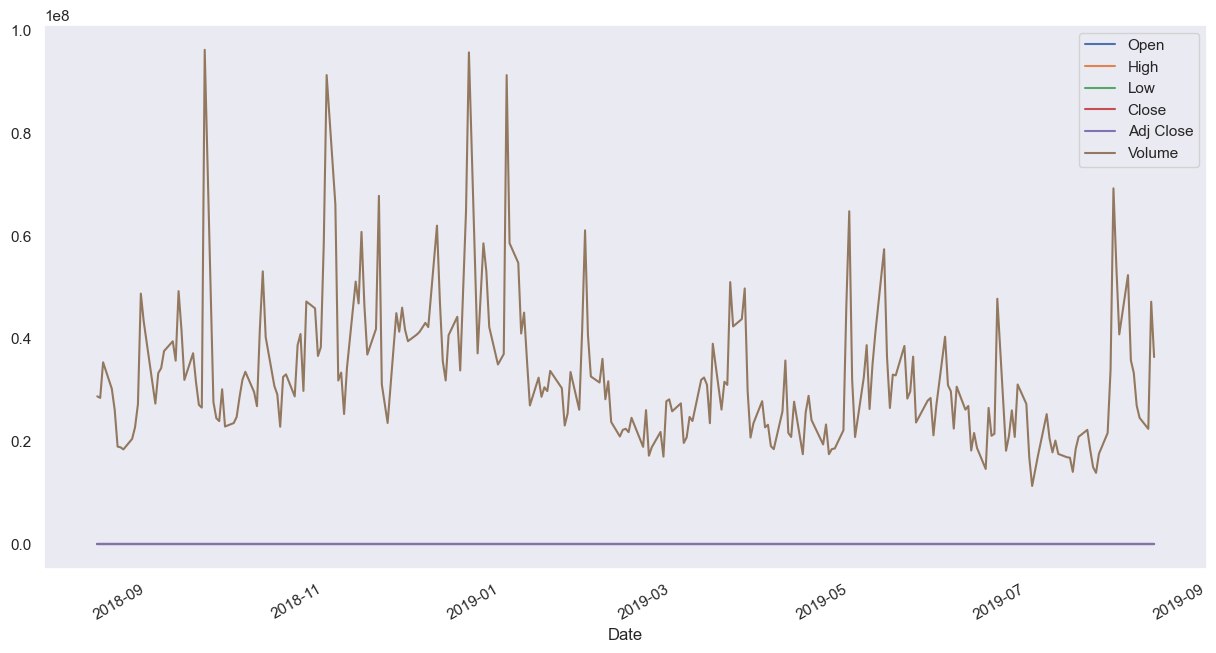

In [64]:
rcParams['figure.figsize']=15,8
df_final.plot()
plt.grid()

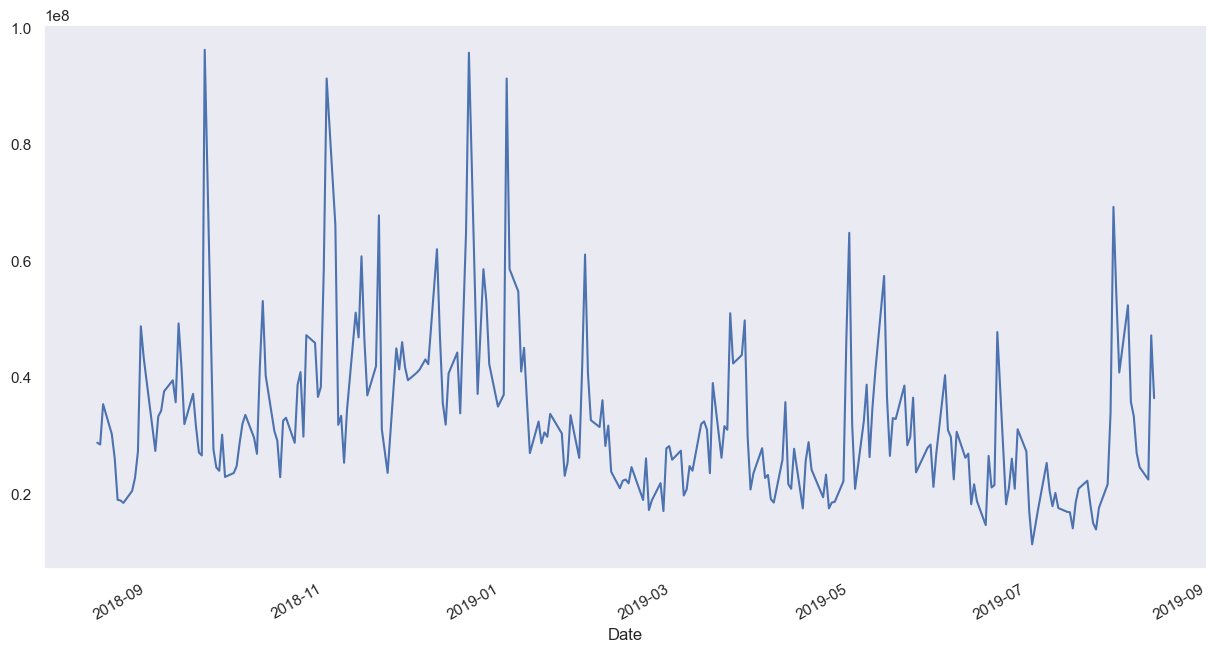

In [65]:
rcParams['figure.figsize']= 15,8

df_final['Volume'].plot();
plt.grid()

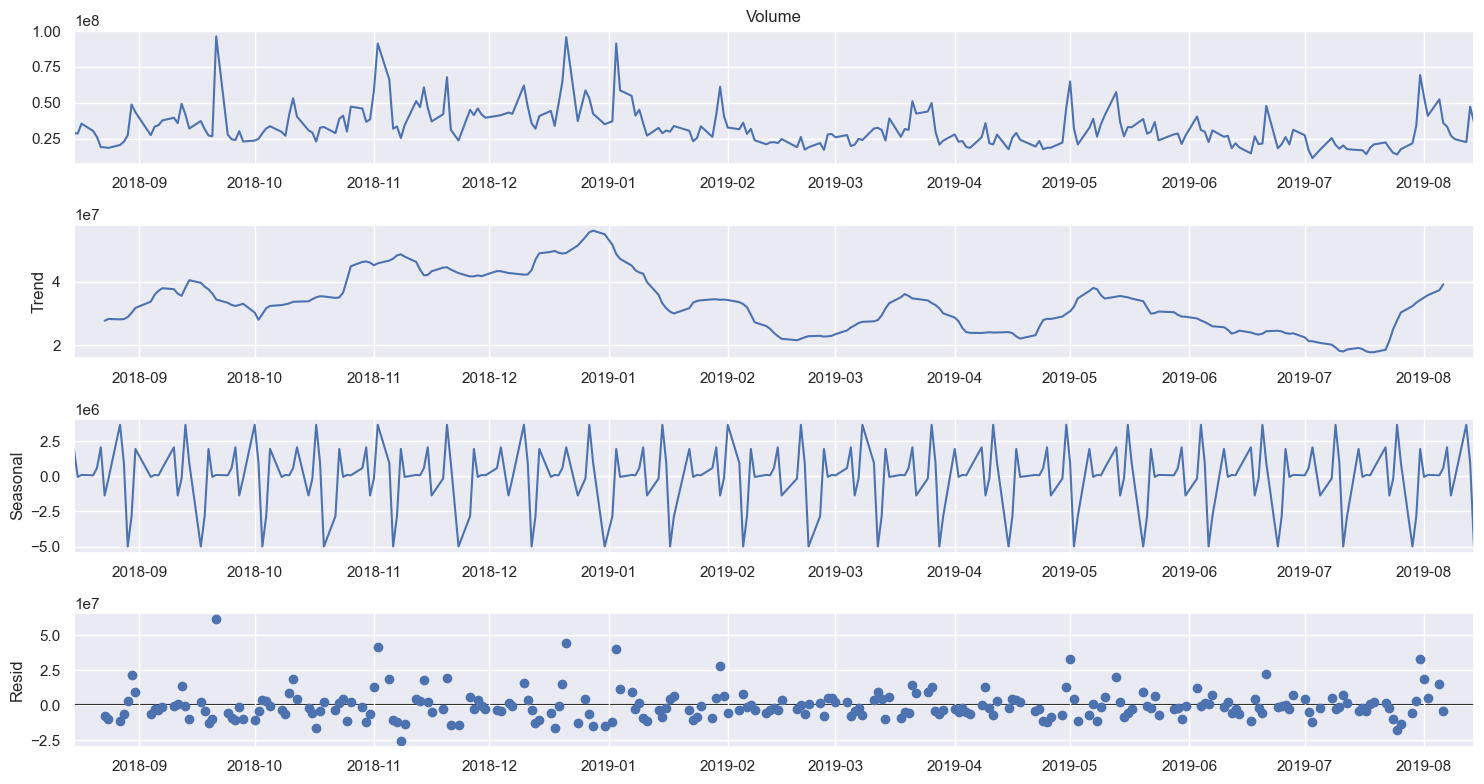

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion = seasonal_decompose(df_final['Volume'], period=12)
decompostion.plot();
plt.show()

In [67]:
# clearly see there is no trend 
# little seasonality is there

In [69]:
# Durbin Watson to check autocorelation
import statsmodels.api as sm
sm.stats.durbin_watson(df_final['Volume'])

0.13804147049471416

## Open Variable With respect to different Year 


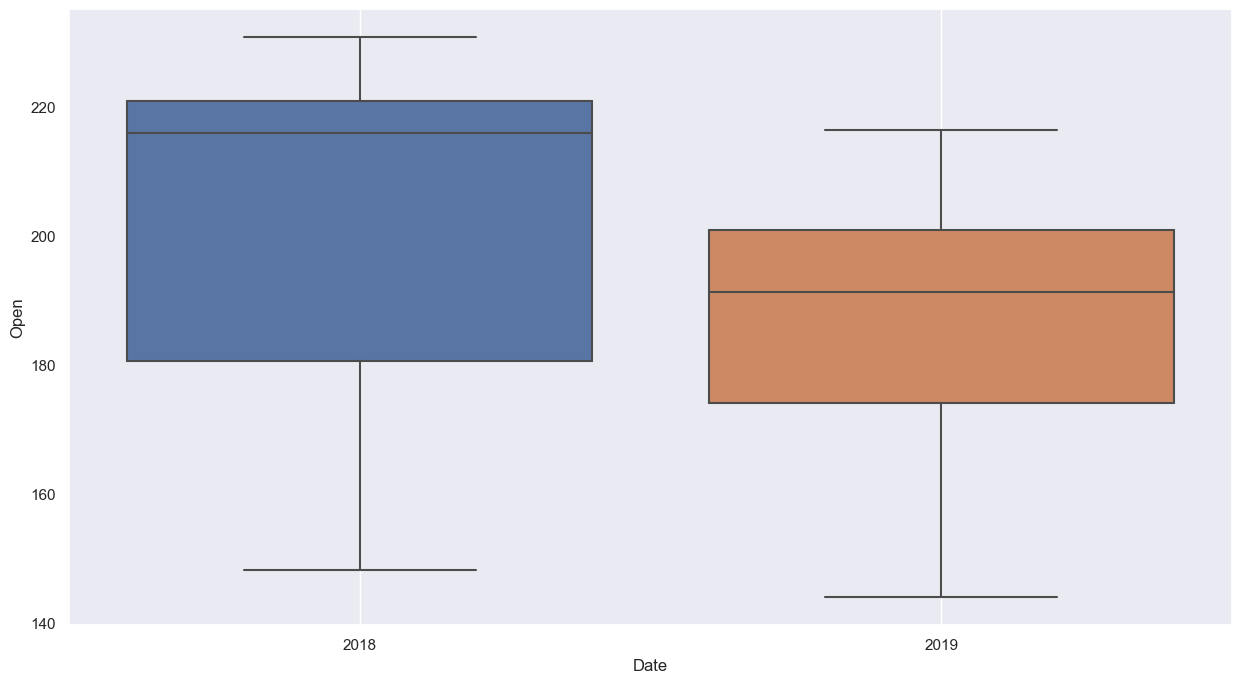

In [70]:
sns.boxplot(x = df_final.index.year, y= df_final['Open'])
plt.grid()

In [71]:
# open price in 2018 is higher than 2019

## Open Variable With Respect to diff months

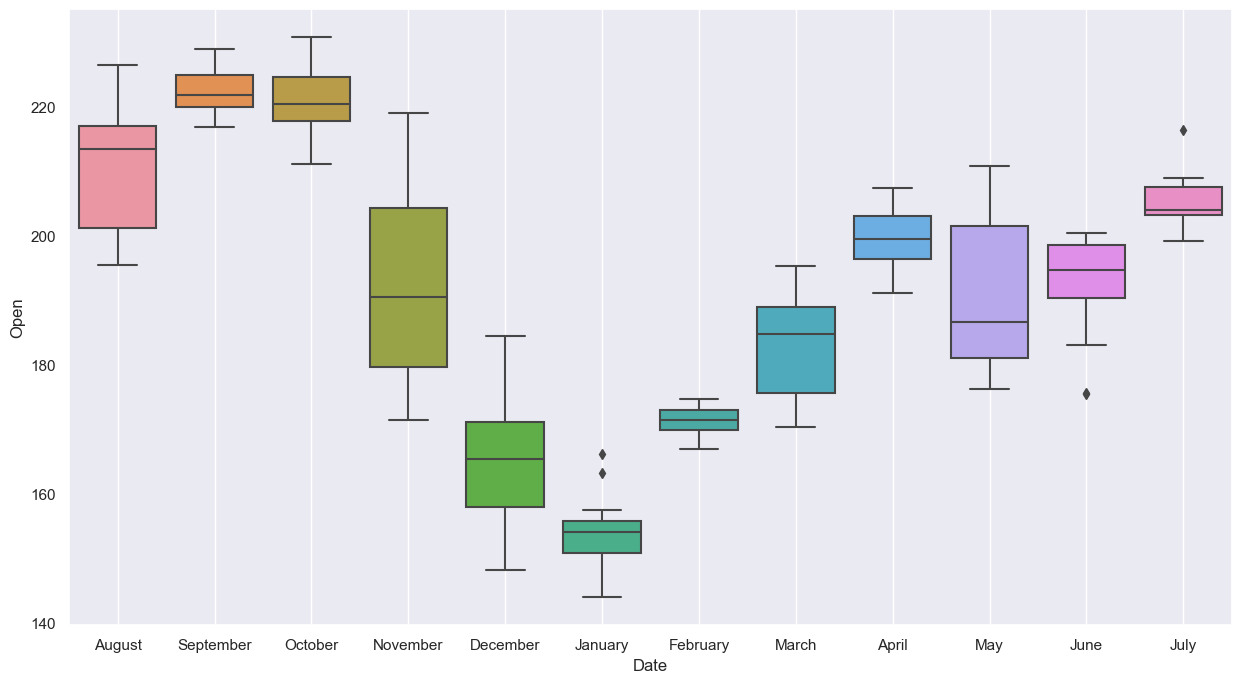

In [74]:
sns.boxplot(x = df_final.index.month_name(), y=df_final['Open'])
plt.grid()

In [ ]:
# Analysis:
# Best time to purchase Stock January
# Best time to Sell Stock Sep and Oct
# there is rise in 5 month and then stable (Jan to May, May to OCt) lets decompose by period = 5

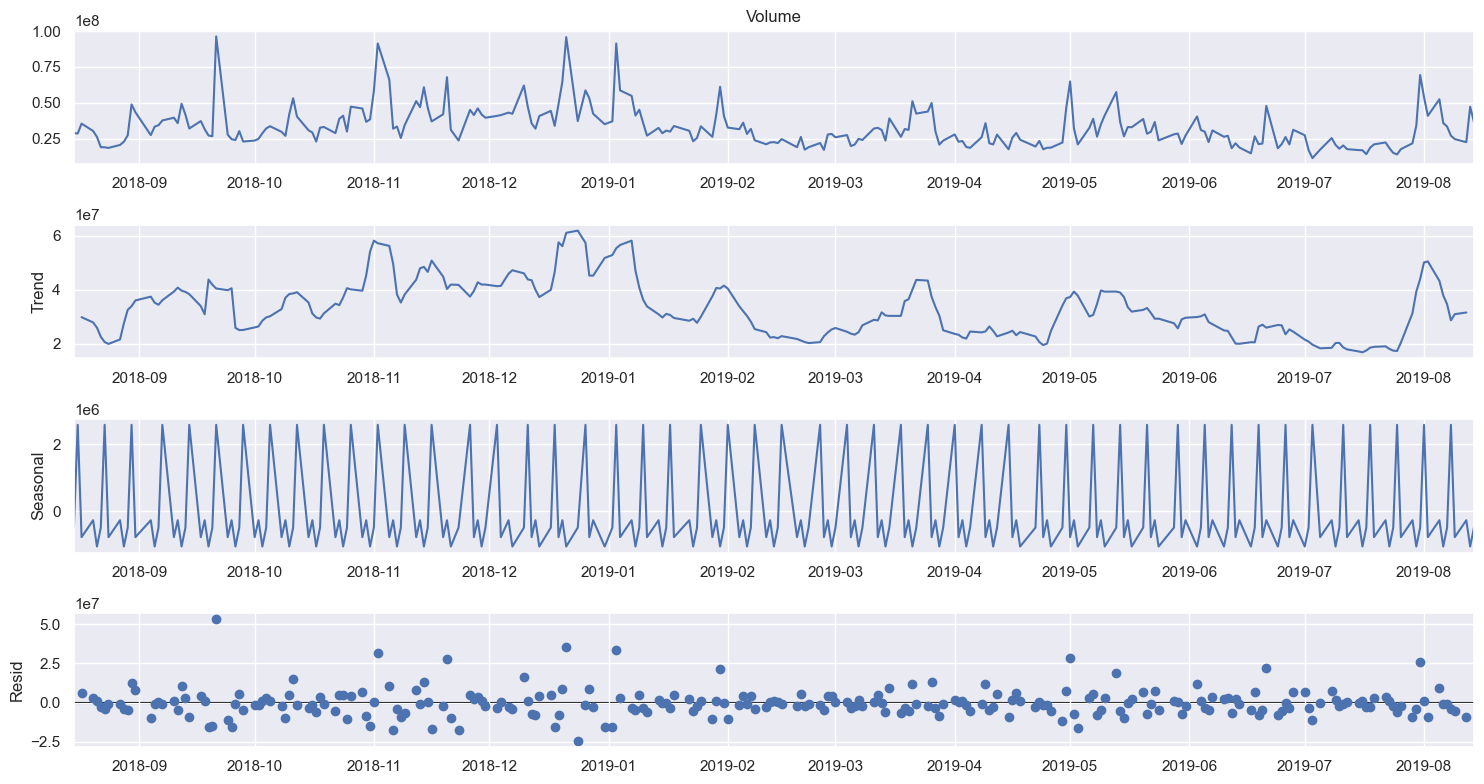

In [81]:
decompostion = seasonal_decompose(df_final['Volume'], period=5, model = 'additive')
decompostion.plot();
plt.show()

In [82]:
# Cyclicity is more clear now
# tried and tested with diff no. of period, 5 is best so far

In [83]:
# Trying with multiplicative model to see any improvement

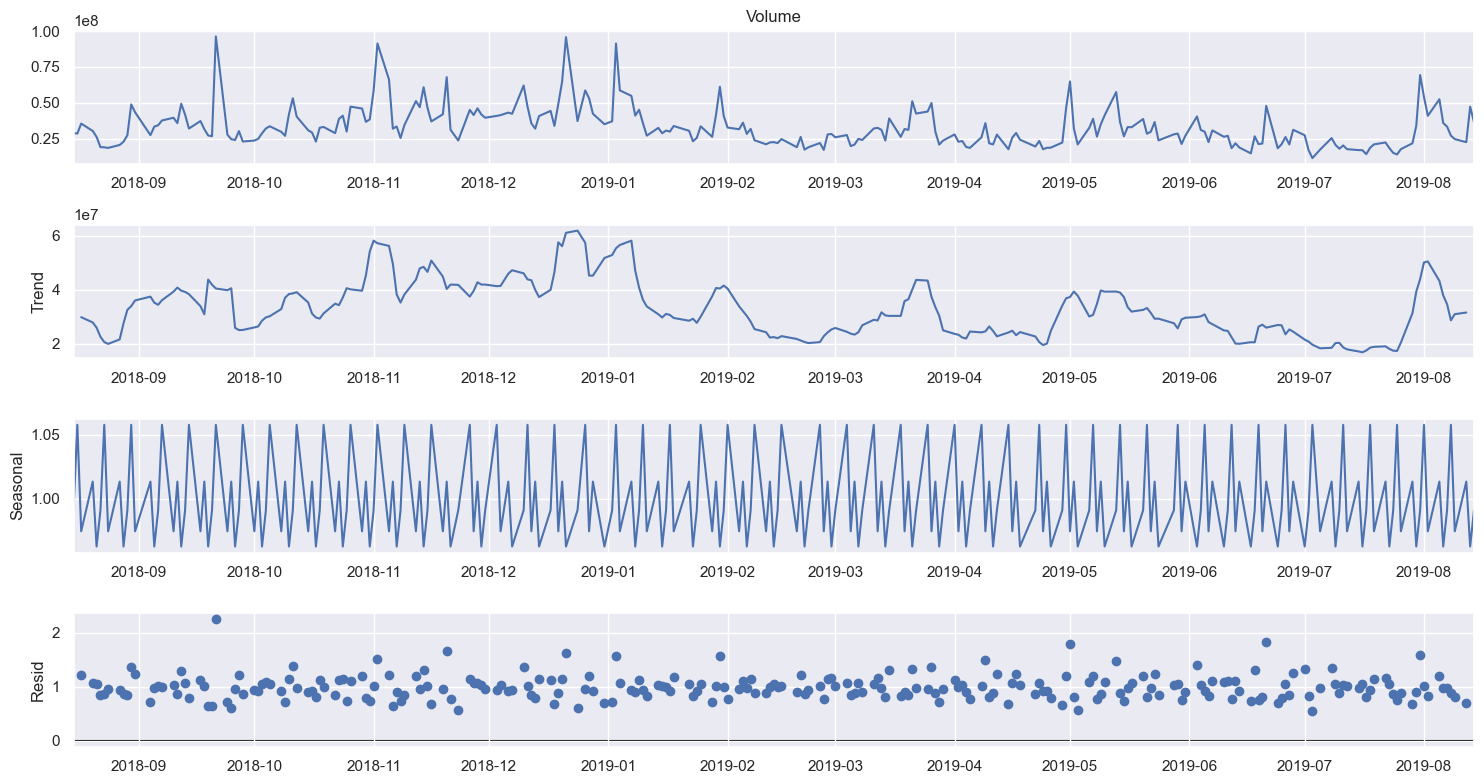

In [84]:
decompostion = seasonal_decompose(df_final['Volume'], period=5, model = 'multiplicative')
decompostion.plot();
plt.show()

In [85]:
# Cyclicity is better in additive model 
# There fore we do with additive 

In [86]:
trend = decompostion.trend
seasonality = decompostion.seasonal
residual = decompostion.resid

print('Trend', '\n', trend.head(12),'\n')
print('seasonality', '\n', seasonality.head(12),'\n')
print('residual', '\n', residual.head(12),'\n')

Trend 
 Date
2018-08-15           NaN
2018-08-16           NaN
2018-08-17    29836500.0
2018-08-20    27878600.0
2018-08-21    25955160.0
2018-08-22    22565040.0
2018-08-23    20612520.0
2018-08-24    19935920.0
2018-08-27    21583260.0
2018-08-28    27565380.0
2018-08-29    32538120.0
2018-08-30    33911120.0
Name: trend, dtype: float64 

seasonality 
 Date
2018-08-15    0.991134
2018-08-16    1.057854
2018-08-17    0.974697
2018-08-20    1.013504
2018-08-21    0.962811
2018-08-22    0.991134
2018-08-23    1.057854
2018-08-24    0.974697
2018-08-27    1.013504
2018-08-28    0.962811
2018-08-29    0.991134
2018-08-30    1.057854
Name: seasonal, dtype: float64 

residual 
 Date
2018-08-15         NaN
2018-08-16         NaN
2018-08-17    1.218195
2018-08-20    1.071939
2018-08-21    1.046814
2018-08-22    0.850352
2018-08-23    0.866002
2018-08-24    0.950848
2018-08-27    0.938302
2018-08-28    0.858198
2018-08-29    0.845120
2018-08-30    1.360181
Name: resid, dtype: float64 



## Splitting Data in Train and Test

In [88]:
# Extracting Month and Year

df_final['Month'] = df_final.index.month
df_final['Year'] = df_final.index.year
df_final.head()

,Open,High,Low,Close,Adj Close,Volume,Month,Year
Date,,,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600,8,2018
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400,8,2018
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000,8,2018
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700,8,2018
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800,8,2018


In [ ]:
# Since it is a time Series Data spliting should be sequential

In [ ]:
# i have taken  '2019-06-14' date for splitting so that my data should split into 25% test and 75 % train

In [94]:
train = df_final[df_final.index < pd.to_datetime('2019-06-14')]
train.shape

(208, 8)

In [95]:
train.tail()

,Open,High,Low,Close,Adj Close,Volume,Month,Year
Date,,,,,,,,
2019-06-07,186.509995,191.919998,185.770004,190.149994,189.430267,30684400,6,2019
2019-06-10,191.809998,195.369995,191.619995,192.580002,191.851074,26220900,6,2019
2019-06-11,194.860001,196.000000,193.600006,194.809998,194.072632,26932900,6,2019
2019-06-12,193.949997,195.970001,193.389999,194.190002,193.454987,18253200,6,2019
2019-06-13,194.699997,196.789993,193.600006,194.149994,193.415115,21674600,6,2019


In [96]:
test = df_final[df_final.index >= pd.to_datetime('2019-06-14')]
test.shape

(43, 8)

In [112]:
test.head()

,Open,High,Low,Close,Adj Close,Volume,Month,Year
Date,,,,,,,,
2019-06-14,191.550003,193.589996,190.300003,192.740005,192.010468,18761500,6,2019
2019-06-17,192.899994,194.960007,192.169998,193.889999,193.156113,14669100,6,2019
2019-06-18,196.050003,200.289993,195.210007,198.449997,197.698853,26551000,6,2019
2019-06-19,199.679993,199.880005,197.309998,197.869995,197.121048,21124200,6,2019
2019-06-20,200.369995,200.610001,198.029999,199.460007,198.705032,21514000,6,2019


In [113]:
train_final = train[['Volume']]
test_final  = test[['Volume']]

## Checking Time Series is Stationary or not

In [114]:
def test_stationarity(timeseries):
    
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey - Fuller Test :")
    dftest = adfuller(timeseries, autolag='AIC')
    # dftest type is tupple
    print(dftest)
    print("*********************************************")
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used',
                                            'No of Observation used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical value {key}'] = value
    print(dfoutput, '\n')
    
    
test_stationarity(train_final['Volume'])

Results of Dickey - Fuller Test :
(-2.864791859453103, 0.04959808813878138, 6, 201, {'1%': -3.4633090972761744, '5%': -2.876029332045744, '10%': -2.5744932593252643}, 6805.969714854309)
*********************************************
Test Statistic             -2.864792
p-value                     0.049598
#Lags used                  6.000000
No of Observation used    201.000000
Critical value 1%          -3.463309
Critical value 5%          -2.876029
Critical value 10%         -2.574493
dtype: float64 



In [115]:
# from above we get p_value less than 0.05 means timeseries is stationary
# hence d,D is 0

In [116]:
#Calculating value for p d and q

import itertools
p = q = range(0, 3)
d = range(0,1) 
pdq = list(itertools.product(p, d, q))
print(pdq)

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print("Examples of parameter combinations for Model....")
print('Model : {}{}'.format(pdq[1], model_pdq[1]))
print('Model : {}{}'.format(pdq[1], model_pdq[2]))
print('Model : {}{}'.format(pdq[2], model_pdq[3]))
print('Model : {}{}'.format(pdq[2], model_pdq[4]))
print('Model : {}{}'.format(pdq[1], model_pdq[5]))

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2)]
Examples of parameter combinations for Model....
Model : (0, 0, 1)(0, 0, 1, 5)
Model : (0, 0, 1)(0, 0, 2, 5)
Model : (0, 0, 2)(1, 0, 0, 5)
Model : (0, 0, 2)(1, 0, 1, 5)
Model : (0, 0, 1)(1, 0, 2, 5)


# BUILDING ARIMA MODEL

In [117]:
# It has no trend but still trying ARIMA to compare it with SARIMA and SARIMAX

In [118]:
dfObj = pd.DataFrame(columns=['param', 'AIC']) # empty dataframe

In [128]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    mod = ARIMA(train_final['Volume'], order=param) #order is the pdq value for trend
    results_Arima = mod.fit()
    print("ARIMA{} - AIC:{}".format(param, results_Arima.aic))
    dfObj = dfObj.append({'param':param, 'AIC':results_Arima.aic}, ignore_index=True)


ARIMA(0, 0, 0) - AIC:8332.739978519614
ARIMA(0, 0, 1) - AIC:7384.608245529029
ARIMA(0, 0, 2) - AIC:7379.130340788781
ARIMA(1, 0, 0) - AIC:7372.0748963861715
ARIMA(1, 0, 1) - AIC:7373.194529993922
ARIMA(1, 0, 2) - AIC:7366.068758423835
ARIMA(2, 0, 0) - AIC:7373.701699527644
ARIMA(2, 0, 1) - AIC:7367.221284403338
ARIMA(2, 0, 2) - AIC:7367.968658628422


In [132]:
dfObj.sort_values(by=['AIC']).reset_index(drop=True)

,param,AIC
0,"(1, 0, 2)",7366.068758
1,"(1, 0, 2)",7366.068758
2,"(1, 0, 2)",7366.068758
3,"(1, 0, 2)",7366.068758
4,"(1, 0, 2)",7366.068758
...,...,...
67,"(0, 0, 0)",8332.739979
68,"(0, 0, 0)",8332.739979
69,"(0, 0, 0)",8332.739979
70,"(0, 0, 0)",8332.739979


In [133]:
# ARIMA(1,0,2) has the lowest AIC

mod = ARIMA(train_final['Volume'], order=(1,0,2))
results_Arima= mod.fit()
print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                  208
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -3678.034
Date:                Sat, 23 Sep 2023   AIC                           7366.069
Time:                        16:53:04   BIC                           7382.756
Sample:                             0   HQIC                          7372.816
                                - 208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.434e+07   3.04e-10   1.13e+17      0.000    3.43e+07    3.43e+07
ar.L1          0.9466      0.044     21.495      0.000       0.860       1.033
ma.L1         -0.5248      0.067     -7.841      0.0

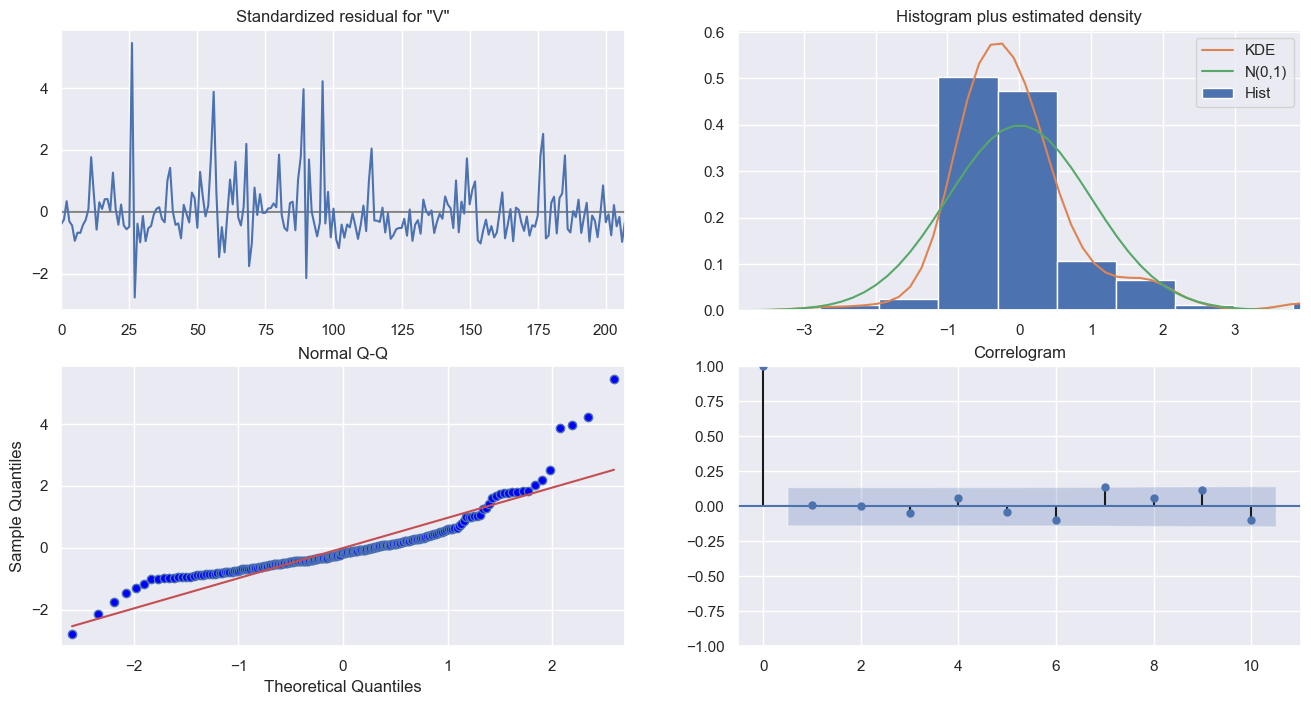

In [134]:
results_Arima.plot_diagnostics(figsize=(16,8))
plt.show()

In [135]:
final_hat_avg = test_final.copy()
pred_ARIMA = results_Arima.forecast(steps=len(test_final))
pred_ARIMA

208    2.732295e+07
209    2.869386e+07
210    2.899492e+07
211    2.927991e+07
212    2.954969e+07
213    2.980508e+07
214    3.004684e+07
215    3.027570e+07
216    3.049235e+07
217    3.069743e+07
218    3.089158e+07
219    3.107536e+07
220    3.124934e+07
221    3.141403e+07
222    3.156994e+07
223    3.171752e+07
224    3.185723e+07
225    3.198949e+07
226    3.211469e+07
227    3.223320e+07
228    3.234540e+07
229    3.245160e+07
230    3.255214e+07
231    3.264732e+07
232    3.273741e+07
233    3.282270e+07
234    3.290344e+07
235    3.297987e+07
236    3.305222e+07
237    3.312071e+07
238    3.318554e+07
239    3.324692e+07
240    3.330502e+07
241    3.336002e+07
242    3.341208e+07
243    3.346137e+07
244    3.350803e+07
245    3.355220e+07
246    3.359401e+07
247    3.363359e+07
248    3.367105e+07
249    3.370652e+07
250    3.374010e+07
Name: predicted_mean, dtype: float64

### Evaluation

In [139]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final['Volume'], pred_ARIMA, squared=False)) #squared=False to calcualte square root
print(rmse)

3663.273017682561


In [140]:
resultDf = pd.DataFrame({'Test RMSE' : rmse}, index = ['ARIMA(1,0,2)'])
resultDf

,Test RMSE
"ARIMA(1,0,2)",3663.273018


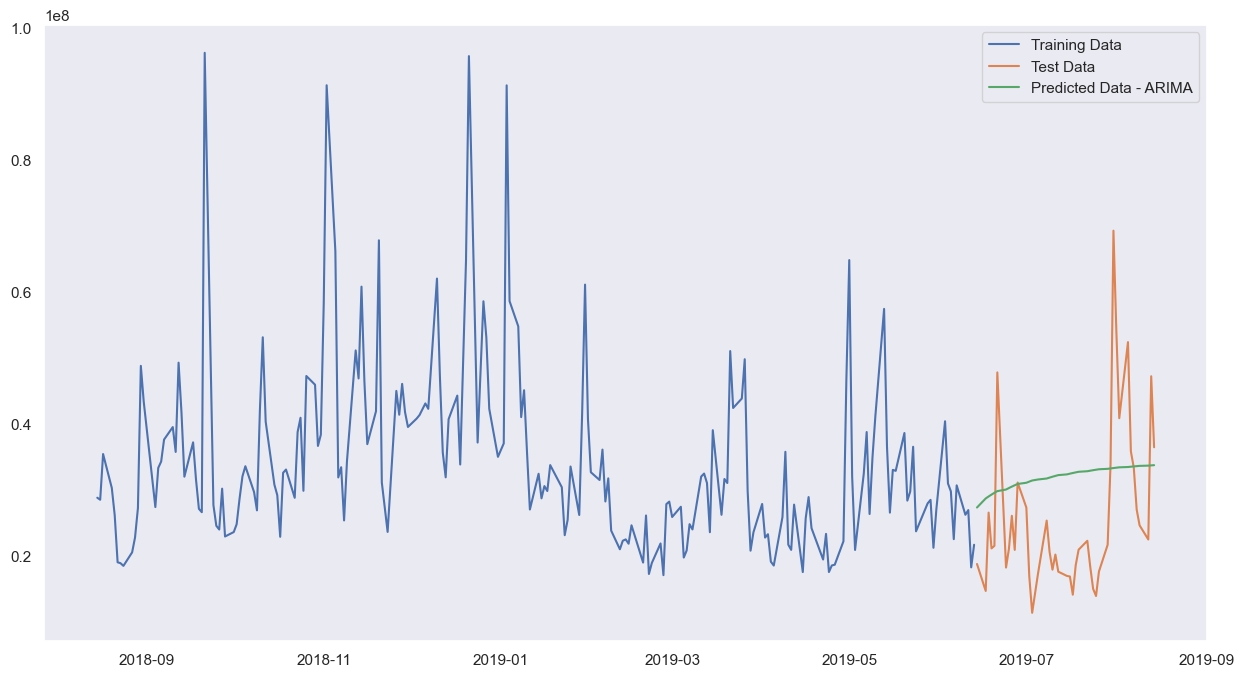

In [141]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_ARIMA, label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

## BUILDING SARIMA

In [142]:
dfObj2 = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [144]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], order=param,
                                       seasonal_order=param_seasonal, 
                                      enforce_stationarity=False, enforce_invertibility=False)
        results_SARIMA = mod.fit()
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param': param, 'seasonal':param_seasonal, 
                               'AIC':results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 5) - AIC:7803.902158390863
SARIMA(0, 0, 0)x(0, 0, 1, 5) - AIC:7516.843047531703
SARIMA(0, 0, 0)x(0, 0, 2, 5) - AIC:7311.014474314488
SARIMA(0, 0, 0)x(1, 0, 0, 5) - AIC:7335.756112170122
SARIMA(0, 0, 0)x(1, 0, 1, 5) - AIC:7240.848774197258
SARIMA(0, 0, 0)x(1, 0, 2, 5) - AIC:7067.2554968795375
SARIMA(0, 0, 0)x(2, 0, 0, 5) - AIC:7120.874521327679
SARIMA(0, 0, 0)x(2, 0, 1, 5) - AIC:7101.754037207325
SARIMA(0, 0, 0)x(2, 0, 2, 5) - AIC:7069.848627478312
SARIMA(0, 0, 1)x(0, 0, 0, 5) - AIC:7643.9036180653375
SARIMA(0, 0, 1)x(0, 0, 1, 5) - AIC:7432.84822447345
SARIMA(0, 0, 1)x(0, 0, 2, 5) - AIC:7241.978553953102
SARIMA(0, 0, 1)x(1, 0, 0, 5) - AIC:7482.677398931117
SARIMA(0, 0, 1)x(1, 0, 1, 5) - AIC:7401.246131356325
SARIMA(0, 0, 1)x(1, 0, 2, 5) - AIC:7218.723683044127
SARIMA(0, 0, 1)x(2, 0, 0, 5) - AIC:7295.362488980223
SARIMA(0, 0, 1)x(2, 0, 1, 5) - AIC:7293.11300475532
SARIMA(0, 0, 1)x(2, 0, 2, 5) - AIC:7220.030979839006
SARIMA(0, 0, 2)x(0, 0, 0, 5) - AIC:7579.195547

In [146]:
dfObj2.sort_values(by=['AIC']).reset_index(drop=True)

,param,seasonal,AIC
0,"(1, 0, 2)","(0, 0, 2, 5)",6914.849720
1,"(1, 0, 2)","(0, 0, 2, 5)",6914.849720
2,"(2, 0, 2)","(0, 0, 2, 5)",6916.638557
3,"(2, 0, 2)","(0, 0, 2, 5)",6916.638557
4,"(1, 0, 2)","(2, 0, 2, 5)",6924.302972
...,...,...,...
157,"(0, 0, 1)","(0, 0, 0, 5)",7643.903618
158,"(2, 0, 1)","(0, 0, 0, 5)",7768.685771
159,"(2, 0, 1)","(0, 0, 0, 5)",7768.685771
160,"(0, 0, 0)","(0, 0, 0, 5)",7803.902158


In [147]:
# better than arima

In [148]:
# (1, 0, 2)	(0, 0, 2, 5) 6914.849724
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], order=(1,0,2),
                                       seasonal_order=(0,0,2,5), 
                                      enforce_stationarity=False, enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3451.425
Date:                           Sat, 23 Sep 2023   AIC                           6914.850
Time:                                   17:06:35   BIC                           6934.488
Sample:                                        0   HQIC                          6922.801
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9984      0.004    225.764      0.000       0.990       1.007
ma.L1         -0.5659      0.056    -10.017

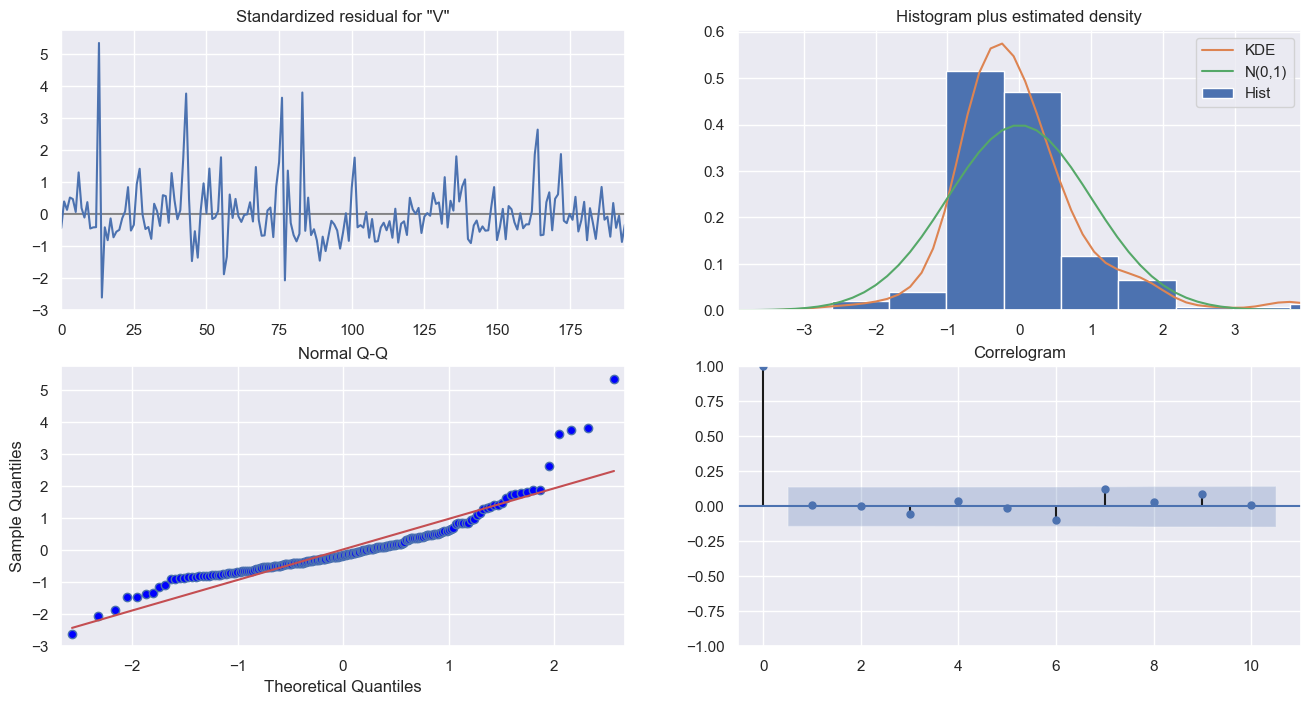

In [149]:
results_SARIMA.plot_diagnostics(figsize=(16,8))
plt.show()

In [150]:
final_hat_avg = test_final.copy()
pred_SARIMA = results_SARIMA.get_forecast(steps=len(test_final))
pred_SARIMA.predicted_mean

208    2.551055e+07
209    2.511873e+07
210    2.604989e+07
211    2.666096e+07
212    2.748825e+07
213    2.606423e+07
214    2.666695e+07
215    2.646111e+07
216    2.754848e+07
217    2.723640e+07
218    2.655696e+07
219    2.638215e+07
220    2.633941e+07
221    2.629675e+07
222    2.625416e+07
223    2.621163e+07
224    2.616918e+07
225    2.612679e+07
226    2.608447e+07
227    2.604222e+07
228    2.600004e+07
229    2.595793e+07
230    2.591588e+07
231    2.587390e+07
232    2.583200e+07
233    2.579015e+07
234    2.574838e+07
235    2.570668e+07
236    2.566504e+07
237    2.562347e+07
238    2.558196e+07
239    2.554053e+07
240    2.549916e+07
241    2.545786e+07
242    2.541662e+07
243    2.537545e+07
244    2.533435e+07
245    2.529332e+07
246    2.525235e+07
247    2.521145e+07
248    2.517061e+07
249    2.512984e+07
250    2.508914e+07
Name: predicted_mean, dtype: float64

In [151]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
rmse = sqrt(mean_squared_error(test_final.Volume, pred_SARIMA.predicted_mean, squared=False))
mape = mean_absolute_percentage_error(test_final.Volume, pred_SARIMA.predicted_mean)
print(rmse)
print(mape*100)

3547.655829464912
38.117658285028085


In [156]:
resultDf1 = pd.DataFrame({'Test RMSE' : rmse}, index = ['SARIMA(1, 0, 2)(0, 0, 2, 5)'])
resultDf1 = pd.concat([resultDf, resultDf1])
resultDf1

,Test RMSE
"ARIMA(1,0,2)",3663.273018
"SARIMA(1, 0, 2)(0, 0, 2, 5)",3547.655829


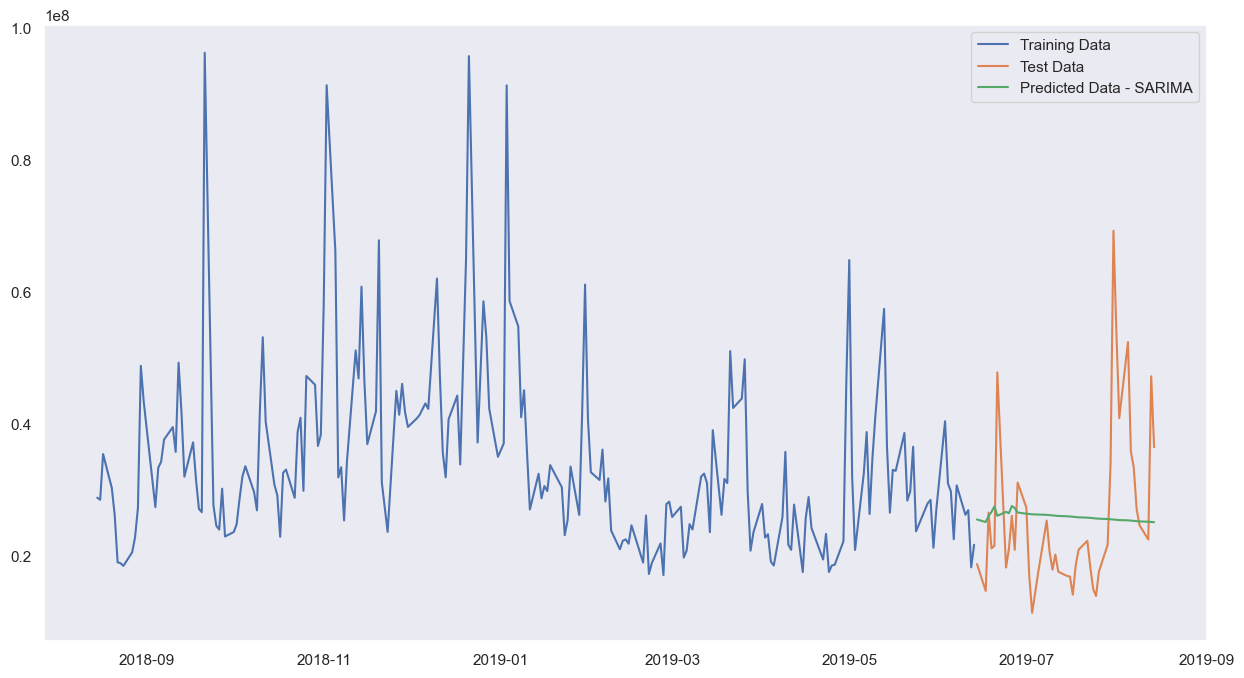

In [154]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

## BUILDING SARIMAX MODEL

In [157]:
train.head()

,Open,High,Low,Close,Adj Close,Volume,Month,Year
Date,,,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600,8,2018
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400,8,2018
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000,8,2018
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700,8,2018
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800,8,2018


In [158]:
#consider other factors for prediction

In [159]:
ex_train = train[['Open', 'Close','High', 'Low']]
ex_test = test[['Open', 'Close','High', 'Low']]

In [160]:
dfObj3 = pd.DataFrame(columns=['param', 'seasonal_ex', 'AIC'])
dfObj3

,param,seasonal_ex,AIC


In [161]:
# Let's first use SARIMAX with exogenous variable
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], exog=ex_train,
                                        order=param,
                                       seasonal_order=param_seasonal, 
                                      enforce_stationarity=False, enforce_invertibility=False)
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj3 = dfObj3.append({'param': param, 'seasonal':param_seasonal, 
                               'AIC':results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:8222.000318658582
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:7147.885736558032
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:6974.64256909251
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:7181.224578838603
SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:7140.308388267435
SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:6969.112725572324
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:7006.388489457344
SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:7003.38803708404
SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:6972.419939979295
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:7267.8214206183
SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:7094.312353589037
SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:6923.0884751807935
SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:7163.321339060871
SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:7091.564698787384
SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:6920.815042060393
SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:6991.566942439297
SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:6990.251352595937
SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:6922.036950170619
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 -

In [162]:
dfObj3.sort_values(by=['AIC'])

,param,seasonal_ex,AIC,seasonal
47,"(1, 0, 2)",NaN,6872.112334,"(0, 0, 2, 5)"
53,"(1, 0, 2)",NaN,6872.654835,"(2, 0, 2, 5)"
50,"(1, 0, 2)",NaN,6873.225432,"(1, 0, 2, 5)"
74,"(2, 0, 2)",NaN,6874.110738,"(0, 0, 2, 5)"
80,"(2, 0, 2)",NaN,6874.556584,"(2, 0, 2, 5)"
...,...,...,...,...
36,"(1, 0, 1)",NaN,7250.235477,"(0, 0, 0, 5)"
54,"(2, 0, 0)",NaN,7257.081652,"(0, 0, 0, 5)"
9,"(0, 0, 1)",NaN,7267.821421,"(0, 0, 0, 5)"
27,"(1, 0, 0)",NaN,7293.565623,"(0, 0, 0, 5)"


In [163]:
# (1, 0, 2)	NaN	6872.112334	(0, 0, 2, 5)
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], exog=ex_train,
                                        order=(1,0,2),
                                       seasonal_order=(0,0,2,5), 
                                      enforce_stationarity=False, enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3426.056
Date:                           Sat, 23 Sep 2023   AIC                           6872.112
Time:                                   17:12:59   BIC                           6904.842
Sample:                                        0   HQIC                          6885.364
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open       -6.795e+04   2.07e+05     -0.328      0.743   -4.73e+05    3.38e+05
Close      -8.821e+05   2.05e+05     -4.312

In [164]:
final_hat_avg = test_final.copy()
pred_SARIMAX = results_SARIMA.get_forecast(steps=len(test_final), exog= ex_test )
pred_SARIMAX.predicted_mean

208    2.481981e+07
209    2.367062e+07
210    3.430941e+07
211    2.392994e+07
212    2.353840e+07
213    2.507269e+07
214    2.147019e+07
215    3.165647e+07
216    2.872498e+07
217    2.221617e+07
218    2.374677e+07
219    3.144630e+07
220    2.026154e+07
221    1.999670e+07
222    2.275707e+07
223    2.647974e+07
224    2.445093e+07
225    2.256572e+07
226    2.673250e+07
227    2.128490e+07
228    2.177259e+07
229    2.588459e+07
230    2.253520e+07
231    2.293057e+07
232    3.470427e+07
233    2.931545e+07
234    2.066439e+07
235    2.272661e+07
236    2.653937e+07
237    2.689659e+07
238    2.440569e+07
239    2.755134e+07
240    6.605677e+07
241    7.221168e+07
242    3.673619e+07
243    4.426444e+07
244    3.175463e+07
245    3.898465e+07
246    3.194331e+07
247    3.036421e+07
248    2.776489e+07
249    6.848063e+07
250    3.418387e+07
Name: predicted_mean, dtype: float64

In [165]:
rmse = sqrt(mean_squared_error(test_final.Volume, pred_SARIMAX.predicted_mean, squared=False))
mape = mean_absolute_percentage_error(test_final.Volume, pred_SARIMAX.predicted_mean)
print(rmse)
print(mape*100)

2872.4639340246645
29.22725167627327


In [169]:
resultDf2 = pd.DataFrame({'Test RMSE' : rmse}, index = ['(1, 0, 2)NaN6872.112334(0, 0, 2, 5)'])
resultDf = pd.concat([resultDf, resultDf1, resultDf2])
resultDf2

,Test RMSE
"(1, 0, 2)NaN6872.112334(0, 0, 2, 5)",2872.463934


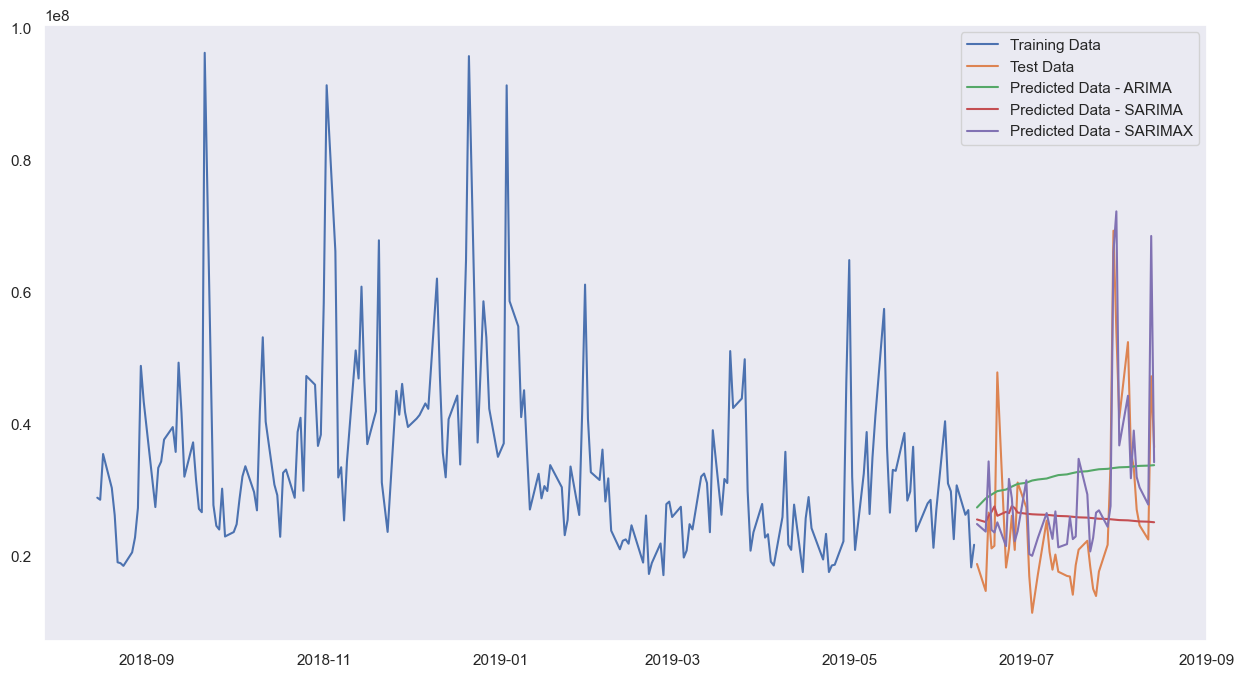

In [168]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_ARIMA, label='Predicted Data - ARIMA')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA')
plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();

In [207]:
#Calculating value for p d and q

import itertools
p = q =d = range(0, 5)
 
pdq = list(itertools.product(p, d, q))
print(pdq)

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print("Examples of parameter combinations for Model....")
print('Model : {}{}'.format(pdq[1], model_pdq[1]))
print('Model : {}{}'.format(pdq[1], model_pdq[2]))
print('Model : {}{}'.format(pdq[2], model_pdq[3]))
print('Model : {}{}'.format(pdq[2], model_pdq[4]))
print('Model : {}{}'.format(pdq[1], model_pdq[5]))

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (2, 3, 4), (2, 4, 0), (2, 4, 1), (2, 4, 2), (2, 4, 3), (2, 4, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (3, 3, 0)

In [195]:
ex_train_1 = train[['Adj Close', 'Close','High', 'Low']]
ex_test_1 = test[['Adj Close', 'Close','High', 'Low']]

In [184]:
dfObj4 = pd.DataFrame(columns=['param', 'seasonal_ex', 'AIC'])
dfObj4

,param,seasonal_ex,AIC


In [208]:
# Let's first use SARIMAX with exogenous variable
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], exog=ex_train_1,
                                        order=param,
                                       seasonal_order=param_seasonal, 
                                      enforce_stationarity=False, enforce_invertibility=False)
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj4 = dfObj4.append({'param': param, 'seasonal':param_seasonal, 
                               'AIC':results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:8221.87970432086
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:7148.08648890507
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:6974.987448367482
SARIMA(0, 0, 0)x(0, 0, 3, 5)7 - AIC:6797.797706249572
SARIMA(0, 0, 0)x(0, 0, 4, 5)7 - AIC:6631.854999469451
SARIMA(0, 0, 0)x(0, 1, 0, 5)7 - AIC:8105.628929397946
SARIMA(0, 0, 0)x(0, 1, 1, 5)7 - AIC:7009.2698670531245
SARIMA(0, 0, 0)x(0, 1, 2, 5)7 - AIC:6807.392650903037
SARIMA(0, 0, 0)x(0, 1, 3, 5)7 - AIC:6621.418444838286
SARIMA(0, 0, 0)x(0, 1, 4, 5)7 - AIC:6448.30000285889
SARIMA(0, 0, 0)x(0, 2, 0, 5)7 - AIC:8115.2858116457355
SARIMA(0, 0, 0)x(0, 2, 1, 5)7 - AIC:6949.648256004481
SARIMA(0, 0, 0)x(0, 2, 2, 5)7 - AIC:6742.520932004679
SARIMA(0, 0, 0)x(0, 2, 3, 5)7 - AIC:6542.468150449042
SARIMA(0, 0, 0)x(0, 2, 4, 5)7 - AIC:6348.54782938445
SARIMA(0, 0, 0)x(0, 3, 0, 5)7 - AIC:7056094388.7320385
SARIMA(0, 0, 0)x(0, 3, 1, 5)7 - AIC:402494.69445610605
SARIMA(0, 0, 0)x(0, 3, 2, 5)7 - AIC:1785770.1197258234
SARIMA(0, 0, 0)x(0, 3, 3, 5

SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:6921.050069857653
SARIMA(0, 0, 1)x(1, 0, 3, 5)7 - AIC:6747.307874492834
SARIMA(0, 0, 1)x(1, 0, 4, 5)7 - AIC:6573.806983474385
SARIMA(0, 0, 1)x(1, 1, 0, 5)7 - AIC:7042.647011170831
SARIMA(0, 0, 1)x(1, 1, 1, 5)7 - AIC:6959.494207705318
SARIMA(0, 0, 1)x(1, 1, 2, 5)7 - AIC:6773.256877802825
SARIMA(0, 0, 1)x(1, 1, 3, 5)7 - AIC:6591.999233899021
SARIMA(0, 0, 1)x(1, 1, 4, 5)7 - AIC:6390.1815669317
SARIMA(0, 0, 1)x(1, 2, 0, 5)7 - AIC:7037.452785619828
SARIMA(0, 0, 1)x(1, 2, 1, 5)7 - AIC:6929.387119371403
SARIMA(0, 0, 1)x(1, 2, 2, 5)7 - AIC:6745.267751538664
SARIMA(0, 0, 1)x(1, 2, 3, 5)7 - AIC:6555.996206493273
SARIMA(0, 0, 1)x(1, 2, 4, 5)7 - AIC:6366.402103433342
SARIMA(0, 0, 1)x(1, 3, 0, 5)7 - AIC:7033.372010036237
SARIMA(0, 0, 1)x(1, 3, 1, 5)7 - AIC:7025.996824125619
SARIMA(0, 0, 1)x(1, 3, 2, 5)7 - AIC:6885.3788301432
SARIMA(0, 0, 1)x(1, 3, 3, 5)7 - AIC:6575.6698407349695
SARIMA(0, 0, 1)x(1, 3, 4, 5)7 - AIC:6410.178896219166
SARIMA(0, 0, 1)x(1, 4, 0, 5)7 -

SARIMA(0, 0, 2)x(2, 0, 4, 5)7 - AIC:6539.836415024092
SARIMA(0, 0, 2)x(2, 1, 0, 5)7 - AIC:6849.420834803064
SARIMA(0, 0, 2)x(2, 1, 1, 5)7 - AIC:6844.713352944533
SARIMA(0, 0, 2)x(2, 1, 2, 5)7 - AIC:6737.674927399701
SARIMA(0, 0, 2)x(2, 1, 3, 5)7 - AIC:6558.368752014254
SARIMA(0, 0, 2)x(2, 1, 4, 5)7 - AIC:6356.438313023109
SARIMA(0, 0, 2)x(2, 2, 0, 5)7 - AIC:6834.536954436122
SARIMA(0, 0, 2)x(2, 2, 1, 5)7 - AIC:6820.5753850882265
SARIMA(0, 0, 2)x(2, 2, 2, 5)7 - AIC:6712.593326553814
SARIMA(0, 0, 2)x(2, 2, 3, 5)7 - AIC:6519.484035630647
SARIMA(0, 0, 2)x(2, 2, 4, 5)7 - AIC:6333.255425649151
SARIMA(0, 0, 2)x(2, 3, 0, 5)7 - AIC:6851.476654950648
SARIMA(0, 0, 2)x(2, 3, 1, 5)7 - AIC:6846.034874296471
SARIMA(0, 0, 2)x(2, 3, 2, 5)7 - AIC:6746.079098977381
SARIMA(0, 0, 2)x(2, 3, 3, 5)7 - AIC:7923.451194569138
SARIMA(0, 0, 2)x(2, 3, 4, 5)7 - AIC:9165.68381358434
SARIMA(0, 0, 2)x(2, 4, 0, 5)7 - AIC:47458002554.999306
SARIMA(0, 0, 2)x(2, 4, 1, 5)7 - AIC:41957814758.78041
SARIMA(0, 0, 2)x(2, 4, 2, 5

SARIMA(0, 0, 3)x(3, 1, 1, 5)7 - AIC:6665.642280242908
SARIMA(0, 0, 3)x(3, 1, 2, 5)7 - AIC:6666.781210115772
SARIMA(0, 0, 3)x(3, 1, 3, 5)7 - AIC:6525.815512200903
SARIMA(0, 0, 3)x(3, 1, 4, 5)7 - AIC:6324.244209246772
SARIMA(0, 0, 3)x(3, 2, 0, 5)7 - AIC:6646.697566417343
SARIMA(0, 0, 3)x(3, 2, 1, 5)7 - AIC:6638.908149564135
SARIMA(0, 0, 3)x(3, 2, 2, 5)7 - AIC:6640.663322952118
SARIMA(0, 0, 3)x(3, 2, 3, 5)7 - AIC:6488.042326546674
SARIMA(0, 0, 3)x(3, 2, 4, 5)7 - AIC:6302.2027473456
SARIMA(0, 0, 3)x(3, 3, 0, 5)7 - AIC:6679.084007143781
SARIMA(0, 0, 3)x(3, 3, 1, 5)7 - AIC:6701.571074563166
SARIMA(0, 0, 3)x(3, 3, 2, 5)7 - AIC:7627.348044896311
SARIMA(0, 0, 3)x(3, 3, 3, 5)7 - AIC:6522.900355030072
SARIMA(0, 0, 3)x(3, 3, 4, 5)7 - AIC:6352.989339352336
SARIMA(0, 0, 3)x(3, 4, 0, 5)7 - AIC:47458790680.07014
SARIMA(0, 0, 3)x(3, 4, 1, 5)7 - AIC:47457854529.62686
SARIMA(0, 0, 3)x(3, 4, 2, 5)7 - AIC:47459197725.498116
SARIMA(0, 0, 3)x(3, 4, 3, 5)7 - AIC:47458903343.018425
SARIMA(0, 0, 3)x(3, 4, 4, 5)

SARIMA(0, 0, 4)x(4, 1, 3, 5)7 - AIC:6490.297578076781
SARIMA(0, 0, 4)x(4, 1, 4, 5)7 - AIC:6291.159794081321
SARIMA(0, 0, 4)x(4, 2, 0, 5)7 - AIC:6453.519195392872
SARIMA(0, 0, 4)x(4, 2, 1, 5)7 - AIC:6444.4837582825
SARIMA(0, 0, 4)x(4, 2, 2, 5)7 - AIC:6446.474502414056
SARIMA(0, 0, 4)x(4, 2, 3, 5)7 - AIC:6448.464256000159
SARIMA(0, 0, 4)x(4, 2, 4, 5)7 - AIC:6268.49873339499
SARIMA(0, 0, 4)x(4, 3, 0, 5)7 - AIC:6506.904322842816
SARIMA(0, 0, 4)x(4, 3, 1, 5)7 - AIC:6500.787324676142
SARIMA(0, 0, 4)x(4, 3, 2, 5)7 - AIC:6487.201342200654
SARIMA(0, 0, 4)x(4, 3, 3, 5)7 - AIC:6578.84069256725
SARIMA(0, 0, 4)x(4, 3, 4, 5)7 - AIC:6400.032721772286
SARIMA(0, 0, 4)x(4, 4, 0, 5)7 - AIC:47459792505.026505
SARIMA(0, 0, 4)x(4, 4, 1, 5)7 - AIC:47458965950.09708
SARIMA(0, 0, 4)x(4, 4, 2, 5)7 - AIC:47460855883.25937
SARIMA(0, 0, 4)x(4, 4, 3, 5)7 - AIC:47458980308.95955
SARIMA(0, 0, 4)x(4, 4, 4, 5)7 - AIC:47459384143.44879
SARIMA(0, 1, 0)x(0, 0, 0, 5)7 - AIC:8202.499303862543
SARIMA(0, 1, 0)x(0, 0, 1, 5)7 -

SARIMA(0, 1, 1)x(0, 2, 1, 5)7 - AIC:6952.103016073095
SARIMA(0, 1, 1)x(0, 2, 2, 5)7 - AIC:6744.0052115034905
SARIMA(0, 1, 1)x(0, 2, 3, 5)7 - AIC:6555.433546013448
SARIMA(0, 1, 1)x(0, 2, 4, 5)7 - AIC:6369.863361507496
SARIMA(0, 1, 1)x(0, 3, 0, 5)7 - AIC:243879.76627600234
SARIMA(0, 1, 1)x(0, 3, 1, 5)7 - AIC:14863667317.693222
SARIMA(0, 1, 1)x(0, 3, 2, 5)7 - AIC:12523.014636246744
SARIMA(0, 1, 1)x(0, 3, 3, 5)7 - AIC:11829.060742022353
SARIMA(0, 1, 1)x(0, 3, 4, 5)7 - AIC:523281.3112818399
SARIMA(0, 1, 1)x(0, 4, 0, 5)7 - AIC:21786846321.846714
SARIMA(0, 1, 1)x(0, 4, 1, 5)7 - AIC:22223482462.04304
SARIMA(0, 1, 1)x(0, 4, 2, 5)7 - AIC:21786860913.089993
SARIMA(0, 1, 1)x(0, 4, 3, 5)7 - AIC:22174568674.88692
SARIMA(0, 1, 1)x(0, 4, 4, 5)7 - AIC:1070752.1879243974
SARIMA(0, 1, 1)x(1, 0, 0, 5)7 - AIC:7118.567633205568
SARIMA(0, 1, 1)x(1, 0, 1, 5)7 - AIC:7048.767590995405
SARIMA(0, 1, 1)x(1, 0, 2, 5)7 - AIC:6873.326744539261
SARIMA(0, 1, 1)x(1, 0, 3, 5)7 - AIC:6701.57992291224
SARIMA(0, 1, 1)x(1, 0

SARIMA(0, 1, 2)x(1, 2, 3, 5)7 - AIC:6531.890873520893
SARIMA(0, 1, 2)x(1, 2, 4, 5)7 - AIC:6346.0866582627
SARIMA(0, 1, 2)x(1, 3, 0, 5)7 - AIC:7058.358841671234
SARIMA(0, 1, 2)x(1, 3, 1, 5)7 - AIC:7162.858450187619
SARIMA(0, 1, 2)x(1, 3, 2, 5)7 - AIC:6779.830221408371
SARIMA(0, 1, 2)x(1, 3, 3, 5)7 - AIC:6745.800404783558
SARIMA(0, 1, 2)x(1, 3, 4, 5)7 - AIC:6570.402478717706
SARIMA(0, 1, 2)x(1, 4, 0, 5)7 - AIC:21786851950.38167
SARIMA(0, 1, 2)x(1, 4, 1, 5)7 - AIC:21786871654.35276
SARIMA(0, 1, 2)x(1, 4, 2, 5)7 - AIC:21843482774.24128
SARIMA(0, 1, 2)x(1, 4, 3, 5)7 - AIC:16398109560.896975
SARIMA(0, 1, 2)x(1, 4, 4, 5)7 - AIC:21863363578.278522
SARIMA(0, 1, 2)x(2, 0, 0, 5)7 - AIC:6945.266711534941
SARIMA(0, 1, 2)x(2, 0, 1, 5)7 - AIC:6943.667328898615
SARIMA(0, 1, 2)x(2, 0, 2, 5)7 - AIC:6838.284242573702
SARIMA(0, 1, 2)x(2, 0, 3, 5)7 - AIC:6665.626680115651
SARIMA(0, 1, 2)x(2, 0, 4, 5)7 - AIC:6492.5575755714735
SARIMA(0, 1, 2)x(2, 1, 0, 5)7 - AIC:6862.861087979201
SARIMA(0, 1, 2)x(2, 1, 1, 5

SARIMA(0, 1, 3)x(2, 3, 0, 5)7 - AIC:6865.159396802697
SARIMA(0, 1, 3)x(2, 3, 1, 5)7 - AIC:6869.081348449356
SARIMA(0, 1, 3)x(2, 3, 2, 5)7 - AIC:7536.915268091267
SARIMA(0, 1, 3)x(2, 3, 3, 5)7 - AIC:6702.077481220204
SARIMA(0, 1, 3)x(2, 3, 4, 5)7 - AIC:13044.92290998506
SARIMA(0, 1, 3)x(2, 4, 0, 5)7 - AIC:21786887282.150417
SARIMA(0, 1, 3)x(2, 4, 1, 5)7 - AIC:21786926492.40447
SARIMA(0, 1, 3)x(2, 4, 2, 5)7 - AIC:21786841311.42724
SARIMA(0, 1, 3)x(2, 4, 3, 5)7 - AIC:20972300464.03483
SARIMA(0, 1, 3)x(2, 4, 4, 5)7 - AIC:21786666977.22395
SARIMA(0, 1, 3)x(3, 0, 0, 5)7 - AIC:6769.411546960311
SARIMA(0, 1, 3)x(3, 0, 1, 5)7 - AIC:6771.201019100246
SARIMA(0, 1, 3)x(3, 0, 2, 5)7 - AIC:6773.232281415218
SARIMA(0, 1, 3)x(3, 0, 3, 5)7 - AIC:6634.338072675753
SARIMA(0, 1, 3)x(3, 0, 4, 5)7 - AIC:6460.647663835002
SARIMA(0, 1, 3)x(3, 1, 0, 5)7 - AIC:6672.355436332427
SARIMA(0, 1, 3)x(3, 1, 1, 5)7 - AIC:6668.075941574092
SARIMA(0, 1, 3)x(3, 1, 2, 5)7 - AIC:6668.767759823017
SARIMA(0, 1, 3)x(3, 1, 3, 5

SARIMA(0, 1, 4)x(3, 3, 2, 5)7 - AIC:9270.128309135376
SARIMA(0, 1, 4)x(3, 3, 3, 5)7 - AIC:7065.318350623395
SARIMA(0, 1, 4)x(3, 3, 4, 5)7 - AIC:7473.171721787826
SARIMA(0, 1, 4)x(3, 4, 0, 5)7 - AIC:21786828100.261417
SARIMA(0, 1, 4)x(3, 4, 1, 5)7 - AIC:21786823565.058735
SARIMA(0, 1, 4)x(3, 4, 2, 5)7 - AIC:21786793347.335857
SARIMA(0, 1, 4)x(3, 4, 3, 5)7 - AIC:21782992218.066044
SARIMA(0, 1, 4)x(3, 4, 4, 5)7 - AIC:21780309876.176903
SARIMA(0, 1, 4)x(4, 0, 0, 5)7 - AIC:6599.1464476676265
SARIMA(0, 1, 4)x(4, 0, 1, 5)7 - AIC:6600.681077328231
SARIMA(0, 1, 4)x(4, 0, 2, 5)7 - AIC:6602.809086054843
SARIMA(0, 1, 4)x(4, 0, 3, 5)7 - AIC:6601.165288817357
SARIMA(0, 1, 4)x(4, 0, 4, 5)7 - AIC:6422.2731264872245
SARIMA(0, 1, 4)x(4, 1, 0, 5)7 - AIC:6484.415456821298
SARIMA(0, 1, 4)x(4, 1, 1, 5)7 - AIC:6484.0381195580485
SARIMA(0, 1, 4)x(4, 1, 2, 5)7 - AIC:6485.884418443467
SARIMA(0, 1, 4)x(4, 1, 3, 5)7 - AIC:6480.515550077409
SARIMA(0, 1, 4)x(4, 1, 4, 5)7 - AIC:6291.1113863521
SARIMA(0, 1, 4)x(4, 2,

SARIMA(0, 2, 0)x(4, 3, 4, 5)7 - AIC:29518569253.21272
SARIMA(0, 2, 0)x(4, 4, 0, 5)7 - AIC:19274743570.780067
SARIMA(0, 2, 0)x(4, 4, 1, 5)7 - AIC:19255798022.08032
SARIMA(0, 2, 0)x(4, 4, 2, 5)7 - AIC:19275770125.781494
SARIMA(0, 2, 0)x(4, 4, 3, 5)7 - AIC:19274790045.501827
SARIMA(0, 2, 0)x(4, 4, 4, 5)7 - AIC:19271217816.525955
SARIMA(0, 2, 1)x(0, 0, 0, 5)7 - AIC:7329.945831687844
SARIMA(0, 2, 1)x(0, 0, 1, 5)7 - AIC:7116.481237071401
SARIMA(0, 2, 1)x(0, 0, 2, 5)7 - AIC:6933.903105457775
SARIMA(0, 2, 1)x(0, 0, 3, 5)7 - AIC:6748.785829259905
SARIMA(0, 2, 1)x(0, 0, 4, 5)7 - AIC:6566.694653299867
SARIMA(0, 2, 1)x(0, 1, 0, 5)7 - AIC:7232.517989522774
SARIMA(0, 2, 1)x(0, 1, 1, 5)7 - AIC:7006.270089445443
SARIMA(0, 2, 1)x(0, 1, 2, 5)7 - AIC:6814.627047871101
SARIMA(0, 2, 1)x(0, 1, 3, 5)7 - AIC:6622.9297941103705
SARIMA(0, 2, 1)x(0, 1, 4, 5)7 - AIC:6411.191939842214
SARIMA(0, 2, 1)x(0, 2, 0, 5)7 - AIC:7256.307655311146
SARIMA(0, 2, 1)x(0, 2, 1, 5)7 - AIC:6980.939130650863
SARIMA(0, 2, 1)x(0, 2, 

SARIMA(0, 2, 2)x(0, 4, 1, 5)7 - AIC:17418244261.819813
SARIMA(0, 2, 2)x(0, 4, 2, 5)7 - AIC:17604183598.88167
SARIMA(0, 2, 2)x(0, 4, 3, 5)7 - AIC:4352483337.238746
SARIMA(0, 2, 2)x(0, 4, 4, 5)7 - AIC:1280553712.8723717
SARIMA(0, 2, 2)x(1, 0, 0, 5)7 - AIC:7157.685034049844
SARIMA(0, 2, 2)x(1, 0, 1, 5)7 - AIC:7030.688119539982
SARIMA(0, 2, 2)x(1, 0, 2, 5)7 - AIC:6852.633400360204
SARIMA(0, 2, 2)x(1, 0, 3, 5)7 - AIC:6671.03455786473
SARIMA(0, 2, 2)x(1, 0, 4, 5)7 - AIC:6492.307609000642
SARIMA(0, 2, 2)x(1, 1, 0, 5)7 - AIC:7088.513819510421
SARIMA(0, 2, 2)x(1, 1, 1, 5)7 - AIC:6965.766911996467
SARIMA(0, 2, 2)x(1, 1, 2, 5)7 - AIC:6780.318010587535
SARIMA(0, 2, 2)x(1, 1, 3, 5)7 - AIC:6596.333672575781
SARIMA(0, 2, 2)x(1, 1, 4, 5)7 - AIC:6410.0356151790465
SARIMA(0, 2, 2)x(1, 2, 0, 5)7 - AIC:7112.526628381291
SARIMA(0, 2, 2)x(1, 2, 1, 5)7 - AIC:6990.133829122332
SARIMA(0, 2, 2)x(1, 2, 2, 5)7 - AIC:6795.841933014206
SARIMA(0, 2, 2)x(1, 2, 3, 5)7 - AIC:6608.616801467384
SARIMA(0, 2, 2)x(1, 2, 4, 

SARIMA(0, 2, 3)x(1, 4, 3, 5)7 - AIC:17434646758.813488
SARIMA(0, 2, 3)x(1, 4, 4, 5)7 - AIC:18180312514.791286
SARIMA(0, 2, 3)x(2, 0, 0, 5)7 - AIC:6948.507152445918
SARIMA(0, 2, 3)x(2, 0, 1, 5)7 - AIC:6950.506372164662
SARIMA(0, 2, 3)x(2, 0, 2, 5)7 - AIC:6806.735951653006
SARIMA(0, 2, 3)x(2, 0, 3, 5)7 - AIC:6630.021599460952
SARIMA(0, 2, 3)x(2, 0, 4, 5)7 - AIC:6449.331192697939
SARIMA(0, 2, 3)x(2, 1, 0, 5)7 - AIC:6884.155897357958
SARIMA(0, 2, 3)x(2, 1, 1, 5)7 - AIC:6872.6572007843815
SARIMA(0, 2, 3)x(2, 1, 2, 5)7 - AIC:6725.444452690323
SARIMA(0, 2, 3)x(2, 1, 3, 5)7 - AIC:6544.963673510349
SARIMA(0, 2, 3)x(2, 1, 4, 5)7 - AIC:6357.511859142896
SARIMA(0, 2, 3)x(2, 2, 0, 5)7 - AIC:6897.144569207932
SARIMA(0, 2, 3)x(2, 2, 1, 5)7 - AIC:6892.745679428612
SARIMA(0, 2, 3)x(2, 2, 2, 5)7 - AIC:6739.7020450712125
SARIMA(0, 2, 3)x(2, 2, 3, 5)7 - AIC:6554.524238623764
SARIMA(0, 2, 3)x(2, 2, 4, 5)7 - AIC:6566.574939647024
SARIMA(0, 2, 3)x(2, 3, 0, 5)7 - AIC:7227.601178651731
SARIMA(0, 2, 3)x(2, 3, 1

SARIMA(0, 2, 4)x(3, 0, 0, 5)7 - AIC:6772.55942301022
SARIMA(0, 2, 4)x(3, 0, 1, 5)7 - AIC:6774.279231500113
SARIMA(0, 2, 4)x(3, 0, 2, 5)7 - AIC:6774.437266303541
SARIMA(0, 2, 4)x(3, 0, 3, 5)7 - AIC:6596.672104883639
SARIMA(0, 2, 4)x(3, 0, 4, 5)7 - AIC:6390.114500873655
SARIMA(0, 2, 4)x(3, 1, 0, 5)7 - AIC:6711.152620466481
SARIMA(0, 2, 4)x(3, 1, 1, 5)7 - AIC:6702.40601846938
SARIMA(0, 2, 4)x(3, 1, 2, 5)7 - AIC:6703.783988219326
SARIMA(0, 2, 4)x(3, 1, 3, 5)7 - AIC:6516.962952759316
SARIMA(0, 2, 4)x(3, 1, 4, 5)7 - AIC:6335.544649553858
SARIMA(0, 2, 4)x(3, 2, 0, 5)7 - AIC:6717.270783037731
SARIMA(0, 2, 4)x(3, 2, 1, 5)7 - AIC:6715.3781461401395
SARIMA(0, 2, 4)x(3, 2, 2, 5)7 - AIC:6717.704536063517
SARIMA(0, 2, 4)x(3, 2, 3, 5)7 - AIC:6527.8742795004855
SARIMA(0, 2, 4)x(3, 2, 4, 5)7 - AIC:6344.790976668095
SARIMA(0, 2, 4)x(3, 3, 0, 5)7 - AIC:6740.712333916983
SARIMA(0, 2, 4)x(3, 3, 1, 5)7 - AIC:6751.545974751709
SARIMA(0, 2, 4)x(3, 3, 2, 5)7 - AIC:6978.57091178137
SARIMA(0, 2, 4)x(3, 3, 3, 5)7

SARIMA(0, 3, 0)x(4, 0, 2, 5)7 - AIC:6992.853435551104
SARIMA(0, 3, 0)x(4, 0, 3, 5)7 - AIC:6990.473303091864
SARIMA(0, 3, 0)x(4, 0, 4, 5)7 - AIC:6954.252399649725
SARIMA(0, 3, 0)x(4, 1, 0, 5)7 - AIC:6784.624772898084
SARIMA(0, 3, 0)x(4, 1, 1, 5)7 - AIC:6760.031882645275
SARIMA(0, 3, 0)x(4, 1, 2, 5)7 - AIC:6763.075322227509
SARIMA(0, 3, 0)x(4, 1, 3, 5)7 - AIC:6757.456084908159
SARIMA(0, 3, 0)x(4, 1, 4, 5)7 - AIC:6674.1786291811695
SARIMA(0, 3, 0)x(4, 2, 0, 5)7 - AIC:6661.065395547315
SARIMA(0, 3, 0)x(4, 2, 1, 5)7 - AIC:6591.23759970407
SARIMA(0, 3, 0)x(4, 2, 2, 5)7 - AIC:6583.414789943497
SARIMA(0, 3, 0)x(4, 2, 3, 5)7 - AIC:6585.49704977516
SARIMA(0, 3, 0)x(4, 2, 4, 5)7 - AIC:6535.961079260969
SARIMA(0, 3, 0)x(4, 3, 0, 5)7 - AIC:6718.330081239892
SARIMA(0, 3, 0)x(4, 3, 1, 5)7 - AIC:6643.049667482977
SARIMA(0, 3, 0)x(4, 3, 2, 5)7 - AIC:6577.767718570253
SARIMA(0, 3, 0)x(4, 3, 3, 5)7 - AIC:6567.5422694622175
SARIMA(0, 3, 0)x(4, 3, 4, 5)7 - AIC:6610.9037591781225
SARIMA(0, 3, 0)x(4, 4, 0, 5

SARIMA(0, 3, 2)x(0, 0, 4, 5)7 - AIC:6563.7859080808485
SARIMA(0, 3, 2)x(0, 1, 0, 5)7 - AIC:7264.0350420149825
SARIMA(0, 3, 2)x(0, 1, 1, 5)7 - AIC:7052.49922867959
SARIMA(0, 3, 2)x(0, 1, 2, 5)7 - AIC:6865.325419922469
SARIMA(0, 3, 2)x(0, 1, 3, 5)7 - AIC:6682.086714408492
SARIMA(0, 3, 2)x(0, 1, 4, 5)7 - AIC:6487.578655809113
SARIMA(0, 3, 2)x(0, 2, 0, 5)7 - AIC:7313.142322356444
SARIMA(0, 3, 2)x(0, 2, 1, 5)7 - AIC:7099.501629875211
SARIMA(0, 3, 2)x(0, 2, 2, 5)7 - AIC:6901.824305847821
SARIMA(0, 3, 2)x(0, 2, 3, 5)7 - AIC:6711.959570264125
SARIMA(0, 3, 2)x(0, 2, 4, 5)7 - AIC:6522.0757752412355
SARIMA(0, 3, 2)x(0, 3, 0, 5)7 - AIC:22026935565.012367
SARIMA(0, 3, 2)x(0, 3, 1, 5)7 - AIC:289642430.840692
SARIMA(0, 3, 2)x(0, 3, 2, 5)7 - AIC:661421152.3781039
SARIMA(0, 3, 2)x(0, 3, 3, 5)7 - AIC:131829019.56357583
SARIMA(0, 3, 2)x(0, 3, 4, 5)7 - AIC:755470.5986783872
SARIMA(0, 3, 2)x(0, 4, 0, 5)7 - AIC:9892117733.87806
SARIMA(0, 3, 2)x(0, 4, 1, 5)7 - AIC:9258424323.905176
SARIMA(0, 3, 2)x(0, 4, 2, 

SARIMA(0, 3, 3)x(1, 1, 1, 5)7 - AIC:7015.546786582456
SARIMA(0, 3, 3)x(1, 1, 2, 5)7 - AIC:6831.981961057714
SARIMA(0, 3, 3)x(1, 1, 3, 5)7 - AIC:6640.468535276379
SARIMA(0, 3, 3)x(1, 1, 4, 5)7 - AIC:6459.175440094645
SARIMA(0, 3, 3)x(1, 2, 0, 5)7 - AIC:7218.769953211307
SARIMA(0, 3, 3)x(1, 2, 1, 5)7 - AIC:7066.0879399785335
SARIMA(0, 3, 3)x(1, 2, 2, 5)7 - AIC:6870.868221901495
SARIMA(0, 3, 3)x(1, 2, 3, 5)7 - AIC:6680.460430945423
SARIMA(0, 3, 3)x(1, 2, 4, 5)7 - AIC:6492.283546054218
SARIMA(0, 3, 3)x(1, 3, 0, 5)7 - AIC:7273.039609114501
SARIMA(0, 3, 3)x(1, 3, 1, 5)7 - AIC:7124.382157337681
SARIMA(0, 3, 3)x(1, 3, 2, 5)7 - AIC:7158.670552409707
SARIMA(0, 3, 3)x(1, 3, 3, 5)7 - AIC:6921.571035837445
SARIMA(0, 3, 3)x(1, 3, 4, 5)7 - AIC:6599.9550594394
SARIMA(0, 3, 3)x(1, 4, 0, 5)7 - AIC:14695127955.655605
SARIMA(0, 3, 3)x(1, 4, 1, 5)7 - AIC:14695078965.258696
SARIMA(0, 3, 3)x(1, 4, 2, 5)7 - AIC:16242966488.961935
SARIMA(0, 3, 3)x(1, 4, 3, 5)7 - AIC:14730999150.722042
SARIMA(0, 3, 3)x(1, 4, 4,

SARIMA(0, 3, 4)x(2, 1, 3, 5)7 - AIC:6627.617956635542
SARIMA(0, 3, 4)x(2, 1, 4, 5)7 - AIC:6442.175998532663
SARIMA(0, 3, 4)x(2, 2, 0, 5)7 - AIC:7044.570929538093
SARIMA(0, 3, 4)x(2, 2, 1, 5)7 - AIC:7045.508009613832
SARIMA(0, 3, 4)x(2, 2, 2, 5)7 - AIC:6854.220643850302
SARIMA(0, 3, 4)x(2, 2, 3, 5)7 - AIC:6663.8033031354025
SARIMA(0, 3, 4)x(2, 2, 4, 5)7 - AIC:6476.640648534958
SARIMA(0, 3, 4)x(2, 3, 0, 5)7 - AIC:7365.541014489858
SARIMA(0, 3, 4)x(2, 3, 1, 5)7 - AIC:7364.741431679686
SARIMA(0, 3, 4)x(2, 3, 2, 5)7 - AIC:7119.230068736904
SARIMA(0, 3, 4)x(2, 3, 3, 5)7 - AIC:6893.589885901895
SARIMA(0, 3, 4)x(2, 3, 4, 5)7 - AIC:6764.793067972056
SARIMA(0, 3, 4)x(2, 4, 0, 5)7 - AIC:14695065136.636307
SARIMA(0, 3, 4)x(2, 4, 1, 5)7 - AIC:14695432829.3247
SARIMA(0, 3, 4)x(2, 4, 2, 5)7 - AIC:16363615906.969028
SARIMA(0, 3, 4)x(2, 4, 3, 5)7 - AIC:9136180875.578716
SARIMA(0, 3, 4)x(2, 4, 4, 5)7 - AIC:14700946167.166624
SARIMA(0, 3, 4)x(3, 0, 0, 5)7 - AIC:6806.8561880753205
SARIMA(0, 3, 4)x(3, 0, 1

SARIMA(0, 4, 0)x(3, 2, 0, 5)7 - AIC:7104.987504703642
SARIMA(0, 4, 0)x(3, 2, 1, 5)7 - AIC:7013.510631918527
SARIMA(0, 4, 0)x(3, 2, 2, 5)7 - AIC:6969.693006096093
SARIMA(0, 4, 0)x(3, 2, 3, 5)7 - AIC:6920.4875410490495
SARIMA(0, 4, 0)x(3, 2, 4, 5)7 - AIC:6725.712537306195
SARIMA(0, 4, 0)x(3, 3, 0, 5)7 - AIC:23131766678.26675
SARIMA(0, 4, 0)x(3, 3, 1, 5)7 - AIC:7006.727262430135
SARIMA(0, 4, 0)x(3, 3, 2, 5)7 - AIC:6916.371841946642
SARIMA(0, 4, 0)x(3, 3, 3, 5)7 - AIC:6971.915077405534
SARIMA(0, 4, 0)x(3, 3, 4, 5)7 - AIC:6796.797480026356
SARIMA(0, 4, 0)x(3, 4, 0, 5)7 - AIC:9279105104.724815
SARIMA(0, 4, 0)x(3, 4, 1, 5)7 - AIC:9279238466.675013
SARIMA(0, 4, 0)x(3, 4, 2, 5)7 - AIC:9279522766.746082
SARIMA(0, 4, 0)x(3, 4, 3, 5)7 - AIC:9279488975.276937
SARIMA(0, 4, 0)x(3, 4, 4, 5)7 - AIC:9280655043.048948
SARIMA(0, 4, 0)x(4, 0, 0, 5)7 - AIC:7167.579438927876
SARIMA(0, 4, 0)x(4, 0, 1, 5)7 - AIC:7161.921966403053
SARIMA(0, 4, 0)x(4, 0, 2, 5)7 - AIC:7180.756874917804
SARIMA(0, 4, 0)x(4, 0, 3, 5

SARIMA(0, 4, 1)x(4, 2, 2, 5)7 - AIC:6678.514543879177
SARIMA(0, 4, 1)x(4, 2, 3, 5)7 - AIC:6871.4768700688
SARIMA(0, 4, 1)x(4, 2, 4, 5)7 - AIC:6605.014830225113
SARIMA(0, 4, 1)x(4, 3, 0, 5)7 - AIC:6853.069282334283
SARIMA(0, 4, 1)x(4, 3, 1, 5)7 - AIC:6930.214420713657
SARIMA(0, 4, 1)x(4, 3, 2, 5)7 - AIC:6929.41500465219
SARIMA(0, 4, 1)x(4, 3, 3, 5)7 - AIC:6853.85514439784
SARIMA(0, 4, 1)x(4, 3, 4, 5)7 - AIC:7074.999198058033
SARIMA(0, 4, 1)x(4, 4, 0, 5)7 - AIC:8384851483.689527
SARIMA(0, 4, 1)x(4, 4, 1, 5)7 - AIC:8384855084.3344345
SARIMA(0, 4, 1)x(4, 4, 2, 5)7 - AIC:8385091071.335782
SARIMA(0, 4, 1)x(4, 4, 3, 5)7 - AIC:10351743145.184906
SARIMA(0, 4, 1)x(4, 4, 4, 5)7 - AIC:9448726983.09469
SARIMA(0, 4, 2)x(0, 0, 0, 5)7 - AIC:7472.04171275998
SARIMA(0, 4, 2)x(0, 0, 1, 5)7 - AIC:7283.8906935686155
SARIMA(0, 4, 2)x(0, 0, 2, 5)7 - AIC:7555.6432391211
SARIMA(0, 4, 2)x(0, 0, 3, 5)7 - AIC:7240.175541256608
SARIMA(0, 4, 2)x(0, 0, 4, 5)7 - AIC:6982.386232036337
SARIMA(0, 4, 2)x(0, 1, 0, 5)7 - A

SARIMA(0, 4, 3)x(0, 2, 4, 5)7 - AIC:6808.011239265132
SARIMA(0, 4, 3)x(0, 3, 0, 5)7 - AIC:2013237990.4267073
SARIMA(0, 4, 3)x(0, 3, 1, 5)7 - AIC:153306105.17323294
SARIMA(0, 4, 3)x(0, 3, 2, 5)7 - AIC:166710391.52123305
SARIMA(0, 4, 3)x(0, 3, 3, 5)7 - AIC:103662.32623252152
SARIMA(0, 4, 3)x(0, 3, 4, 5)7 - AIC:2036755.6152232066
SARIMA(0, 4, 3)x(0, 4, 0, 5)7 - AIC:9276502166.575788
SARIMA(0, 4, 3)x(0, 4, 1, 5)7 - AIC:7370061343.52061
SARIMA(0, 4, 3)x(0, 4, 2, 5)7 - AIC:6458468765.049403
SARIMA(0, 4, 3)x(0, 4, 3, 5)7 - AIC:6629754879.309586
SARIMA(0, 4, 3)x(0, 4, 4, 5)7 - AIC:10164217636.057064
SARIMA(0, 4, 3)x(1, 0, 0, 5)7 - AIC:7280.445120294158
SARIMA(0, 4, 3)x(1, 0, 1, 5)7 - AIC:7128.530566238311
SARIMA(0, 4, 3)x(1, 0, 2, 5)7 - AIC:7344.243080242764
SARIMA(0, 4, 3)x(1, 0, 3, 5)7 - AIC:7085.868917352525
SARIMA(0, 4, 3)x(1, 0, 4, 5)7 - AIC:6816.713362254119
SARIMA(0, 4, 3)x(1, 1, 0, 5)7 - AIC:7296.73242535868
SARIMA(0, 4, 3)x(1, 1, 1, 5)7 - AIC:7147.024749387836
SARIMA(0, 4, 3)x(1, 1, 2

SARIMA(0, 4, 4)x(1, 3, 1, 5)7 - AIC:7527.47655694409
SARIMA(0, 4, 4)x(1, 3, 2, 5)7 - AIC:1526157688.0717003
SARIMA(0, 4, 4)x(1, 3, 3, 5)7 - AIC:6863.601553195467
SARIMA(0, 4, 4)x(1, 3, 4, 5)7 - AIC:2124036450.680666
SARIMA(0, 4, 4)x(1, 4, 0, 5)7 - AIC:9277713868.8922
SARIMA(0, 4, 4)x(1, 4, 1, 5)7 - AIC:9277054842.910763
SARIMA(0, 4, 4)x(1, 4, 2, 5)7 - AIC:10159134909.496532
SARIMA(0, 4, 4)x(1, 4, 3, 5)7 - AIC:9289709230.566843
SARIMA(0, 4, 4)x(1, 4, 4, 5)7 - AIC:10147052258.738338
SARIMA(0, 4, 4)x(2, 0, 0, 5)7 - AIC:7084.153744058543
SARIMA(0, 4, 4)x(2, 0, 1, 5)7 - AIC:7087.912063158572
SARIMA(0, 4, 4)x(2, 0, 2, 5)7 - AIC:7309.191750404638
SARIMA(0, 4, 4)x(2, 0, 3, 5)7 - AIC:7038.213976557777
SARIMA(0, 4, 4)x(2, 0, 4, 5)7 - AIC:6762.906221591196
SARIMA(0, 4, 4)x(2, 1, 0, 5)7 - AIC:7151.792392870457
SARIMA(0, 4, 4)x(2, 1, 1, 5)7 - AIC:7153.799126121428
SARIMA(0, 4, 4)x(2, 1, 2, 5)7 - AIC:6965.603346958127
SARIMA(0, 4, 4)x(2, 1, 3, 5)7 - AIC:6775.644995473973
SARIMA(0, 4, 4)x(2, 1, 4, 5)

SARIMA(1, 0, 0)x(2, 3, 4, 5)7 - AIC:22745.28009121439
SARIMA(1, 0, 0)x(2, 4, 0, 5)7 - AIC:47457955649.72502
SARIMA(1, 0, 0)x(2, 4, 1, 5)7 - AIC:47458492940.43282
SARIMA(1, 0, 0)x(2, 4, 2, 5)7 - AIC:47457619991.47112
SARIMA(1, 0, 0)x(2, 4, 3, 5)7 - AIC:47458128198.935165
SARIMA(1, 0, 0)x(2, 4, 4, 5)7 - AIC:47455200369.980675
SARIMA(1, 0, 0)x(3, 0, 0, 5)7 - AIC:6778.951464781922
SARIMA(1, 0, 0)x(3, 0, 1, 5)7 - AIC:6778.003925809491
SARIMA(1, 0, 0)x(3, 0, 2, 5)7 - AIC:6779.442426459735
SARIMA(1, 0, 0)x(3, 0, 3, 5)7 - AIC:6773.7022587423535
SARIMA(1, 0, 0)x(3, 0, 4, 5)7 - AIC:6600.456443680165
SARIMA(1, 0, 0)x(3, 1, 0, 5)7 - AIC:6629.297124682274
SARIMA(1, 0, 0)x(3, 1, 1, 5)7 - AIC:6624.376738821364
SARIMA(1, 0, 0)x(3, 1, 2, 5)7 - AIC:6625.855917837659
SARIMA(1, 0, 0)x(3, 1, 3, 5)7 - AIC:6627.7639220918
SARIMA(1, 0, 0)x(3, 1, 4, 5)7 - AIC:6451.684095872743
SARIMA(1, 0, 0)x(3, 2, 0, 5)7 - AIC:6603.463060445245
SARIMA(1, 0, 0)x(3, 2, 1, 5)7 - AIC:6593.082193859608
SARIMA(1, 0, 0)x(3, 2, 2, 5

SARIMA(1, 0, 1)x(3, 4, 1, 5)7 - AIC:47458313282.88116
SARIMA(1, 0, 1)x(3, 4, 2, 5)7 - AIC:47458893736.538574
SARIMA(1, 0, 1)x(3, 4, 3, 5)7 - AIC:47457906414.37556
SARIMA(1, 0, 1)x(3, 4, 4, 5)7 - AIC:47216082827.13618
SARIMA(1, 0, 1)x(4, 0, 0, 5)7 - AIC:6597.632404160359
SARIMA(1, 0, 1)x(4, 0, 1, 5)7 - AIC:6596.619109986832
SARIMA(1, 0, 1)x(4, 0, 2, 5)7 - AIC:6598.5853959690885
SARIMA(1, 0, 1)x(4, 0, 3, 5)7 - AIC:6591.498045623028
SARIMA(1, 0, 1)x(4, 0, 4, 5)7 - AIC:6553.948681229872
SARIMA(1, 0, 1)x(4, 1, 0, 5)7 - AIC:6445.3265072876875
SARIMA(1, 0, 1)x(4, 1, 1, 5)7 - AIC:6441.969934004725
SARIMA(1, 0, 1)x(4, 1, 2, 5)7 - AIC:6443.566473016301
SARIMA(1, 0, 1)x(4, 1, 3, 5)7 - AIC:6445.35314936334
SARIMA(1, 0, 1)x(4, 1, 4, 5)7 - AIC:6388.453523032538
SARIMA(1, 0, 1)x(4, 2, 0, 5)7 - AIC:6408.670947951739
SARIMA(1, 0, 1)x(4, 2, 1, 5)7 - AIC:6396.65577271129
SARIMA(1, 0, 1)x(4, 2, 2, 5)7 - AIC:6395.763997110544
SARIMA(1, 0, 1)x(4, 2, 3, 5)7 - AIC:6397.788702451382
SARIMA(1, 0, 1)x(4, 2, 4, 5

SARIMA(1, 0, 2)x(4, 4, 3, 5)7 - AIC:42440632337.18506
SARIMA(1, 0, 2)x(4, 4, 4, 5)7 - AIC:52744710239.29404
SARIMA(1, 0, 3)x(0, 0, 0, 5)7 - AIC:7182.664587714335
SARIMA(1, 0, 3)x(0, 0, 1, 5)7 - AIC:7011.868661078166
SARIMA(1, 0, 3)x(0, 0, 2, 5)7 - AIC:6840.181680727681
SARIMA(1, 0, 3)x(0, 0, 3, 5)7 - AIC:6667.722800300246
SARIMA(1, 0, 3)x(0, 0, 4, 5)7 - AIC:6496.872250120952
SARIMA(1, 0, 3)x(0, 1, 0, 5)7 - AIC:7106.203570770505
SARIMA(1, 0, 3)x(0, 1, 1, 5)7 - AIC:6877.542808708828
SARIMA(1, 0, 3)x(0, 1, 2, 5)7 - AIC:6698.7405793627
SARIMA(1, 0, 3)x(0, 1, 3, 5)7 - AIC:6517.964214240128
SARIMA(1, 0, 3)x(0, 1, 4, 5)7 - AIC:6318.398872934105
SARIMA(1, 0, 3)x(0, 2, 0, 5)7 - AIC:7101.097526474144
SARIMA(1, 0, 3)x(0, 2, 1, 5)7 - AIC:6869.3678029863695
SARIMA(1, 0, 3)x(0, 2, 2, 5)7 - AIC:6670.557791729385
SARIMA(1, 0, 3)x(0, 2, 3, 5)7 - AIC:6480.550474491272
SARIMA(1, 0, 3)x(0, 2, 4, 5)7 - AIC:6295.342971399956
SARIMA(1, 0, 3)x(0, 3, 0, 5)7 - AIC:12619065635.360886
SARIMA(1, 0, 3)x(0, 3, 1, 5)

KeyboardInterrupt: 

In [186]:
dfObj4.sort_values(by=['AIC']) # (0, 0, 0)x(0, 1, 4, 5)

,param,seasonal_ex,AIC,seasonal
323,"(1, 0, 2)",NaN,6655.835711,"(2, 2, 2, 5)"
557,"(2, 0, 2)",NaN,6661.141483,"(1, 2, 2, 5)"
395,"(1, 1, 2)",NaN,6690.136735,"(1, 2, 2, 5)"
638,"(2, 1, 2)",NaN,6695.472805,"(1, 2, 2, 5)"
107,"(0, 1, 0)",NaN,6697.009680,"(2, 2, 2, 5)"
...,...,...,...,...
0,"(0, 0, 0)",NaN,8221.879704,"(0, 0, 0, 5)"
168,"(0, 2, 0)",NaN,8287.882915,"(0, 2, 0, 5)"
165,"(0, 2, 0)",NaN,8291.389389,"(0, 1, 0, 5)"
162,"(0, 2, 0)",NaN,8365.340367,"(0, 0, 0, 5)"


In [206]:
# (1, 0, 2)	NaN	6872.112334	(2, 2, 2, 5)
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], exog=ex_train_1,
                                        order=(1,0,2),
                                       seasonal_order=(2,2,2,5), 
                                      enforce_stationarity=False, enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(2, 2, 2, 5)   Log Likelihood               -3315.918
Date:                           Sat, 23 Sep 2023   AIC                           6655.836
Time:                                   18:02:03   BIC                           6694.480
Sample:                                        0   HQIC                          6671.497
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Adj Close  -1.289e+07   7.16e+04   -179.873      0.000    -1.3e+07   -1.27e+07
Close       1.167e+07   7.26e+04    160.730

In [200]:
final_hat_avg = test_final.copy()
pred_SARIMAX = results_SARIMA.get_forecast(steps=len(test_final), exog= ex_test_1 )
pred_SARIMAX.predicted_mean

208    2.656197e+07
209    1.585782e+07
210    2.911529e+07
211    1.589002e+07
212    1.013477e+07
213    1.832060e+07
214    8.213187e+06
215    2.615105e+07
216    1.686208e+07
217    8.017898e+06
218    1.695810e+07
219    1.444904e+07
220    1.517063e+07
221    6.780052e+06
222    5.767955e+06
223    1.875244e+07
224    8.502371e+06
225    1.630712e+07
226    1.248166e+07
227    3.716343e+06
228    1.155077e+07
229    5.908096e+06
230    1.548865e+07
231    6.653943e+06
232    1.273961e+07
233    1.558613e+07
234   -1.179987e+06
235    1.264058e+07
236    7.625182e+06
237    3.041277e+06
238    1.041678e+07
239    3.063292e+06
240    4.127504e+07
241    3.923023e+07
242    1.198423e+07
243    3.546434e+07
244    1.304596e+07
245    3.120768e+07
246    1.305514e+07
247   -1.426791e+06
248    9.163735e+06
249    2.125364e+07
250    1.511405e+07
Name: predicted_mean, dtype: float64

In [201]:
rmse = sqrt(mean_squared_error(test_final.Volume, pred_SARIMAX.predicted_mean, squared=False))
mape = mean_absolute_percentage_error(test_final.Volume, pred_SARIMAX.predicted_mean)
print(rmse)
print(mape*100)

3843.9925939099817
46.492461903437906


In [198]:
resultDf2 = pd.DataFrame({'Test RMSE' : rmse}, index = ['(1, 0, 2)	NaN	6872.112334	(0, 0, 2, 5)'])
resultDf = pd.concat([resultDf, resultDf1, resultDf2])
resultDf2

,Test RMSE
"(1, 0, 2)\tNaN\t6872.112334\t(0, 0, 2, 5)",3843.992594


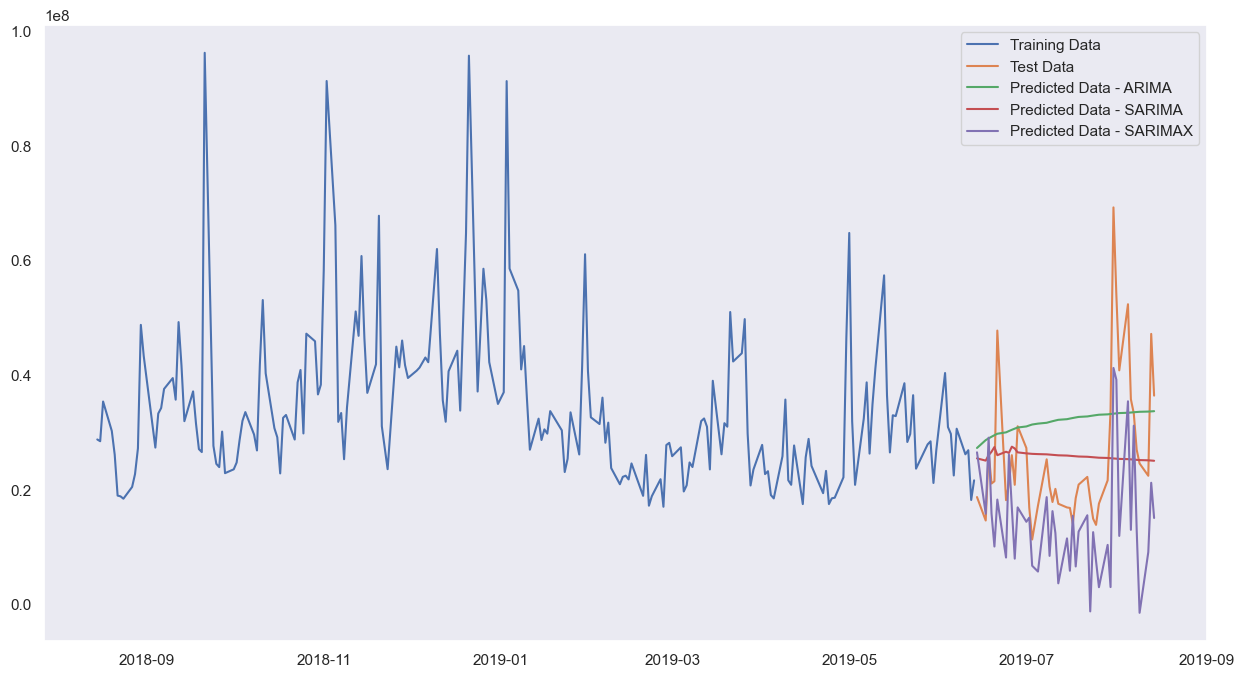

In [199]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_ARIMA, label='Predicted Data - ARIMA')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA')
plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();

## Facebook Prophet MODEL

In [210]:
import prophet

In [223]:
df_prophet = df_final.reset_index()

In [224]:
df_prophet = df_prophet.rename(columns={'Date':'ds', 'Volume':'y'})

In [225]:
df_prophet

,ds,Open,High,Low,Close,Adj Close,y,Month,Year
0,2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600,8,2018
1,2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400,8,2018
2,2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000,8,2018
3,2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700,8,2018
4,2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800,8,2018
...,...,...,...,...,...,...,...,...,...
246,2019-08-08,200.199997,203.529999,199.389999,203.429993,202.659988,27009500,8,2019
247,2019-08-09,201.300003,202.759995,199.289993,200.990005,200.990005,24619700,8,2019
248,2019-08-12,199.619995,202.050003,199.149994,200.479996,200.479996,22474900,8,2019
249,2019-08-13,201.020004,212.139999,200.479996,208.970001,208.970001,47218500,8,2019


In [226]:
from prophet import Prophet
m = Prophet()
model = m.fit(df_prophet)

21:50:50 - cmdstanpy - INFO - Chain [1] start processing
21:50:50 - cmdstanpy - INFO - Chain [1] done processing


In [227]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [228]:
future_pred = model.make_future_dataframe(periods=208, freq=us_bd)

In [229]:
future_pred

,ds
0,2018-08-15
1,2018-08-16
2,2018-08-17
3,2018-08-20
4,2018-08-21
...,...
454,2020-06-08
455,2020-06-09
456,2020-06-10
457,2020-06-11


In [230]:
prediction = model.predict(future_pred)

In [231]:
prediction.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-15,3.518019e+07,1.912919e+07,5.190350e+07,3.518019e+07,3.518019e+07,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,0.0,0.0,0.0,3.575764e+07
1,2018-08-16,3.519278e+07,2.054473e+07,5.251759e+07,3.519278e+07,3.519278e+07,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,0.0,0.0,0.0,3.629997e+07


In [232]:
prediction[['ds', 'yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
449,2020-06-01,1.053036e+07,-7.146923e+06,2.728731e+07
450,2020-06-02,9.292751e+06,-6.690201e+06,2.621931e+07
451,2020-06-03,9.572952e+06,-7.620794e+06,2.638217e+07
452,2020-06-04,1.005295e+07,-6.955184e+06,2.658362e+07
453,2020-06-05,1.191436e+07,-4.351941e+06,2.865087e+07
454,2020-06-08,1.018215e+07,-7.385375e+06,2.648864e+07
455,2020-06-09,8.944543e+06,-8.600708e+06,2.562626e+07
456,2020-06-10,9.224744e+06,-8.419474e+06,2.437873e+07
457,2020-06-11,9.704738e+06,-6.756239e+06,2.701557e+07
458,2020-06-12,1.156615e+07,-5.384896e+06,2.792871e+07


In [233]:
len(prediction)

459

In [235]:
prediction.to_csv('stock_prediction_dataset.csv')

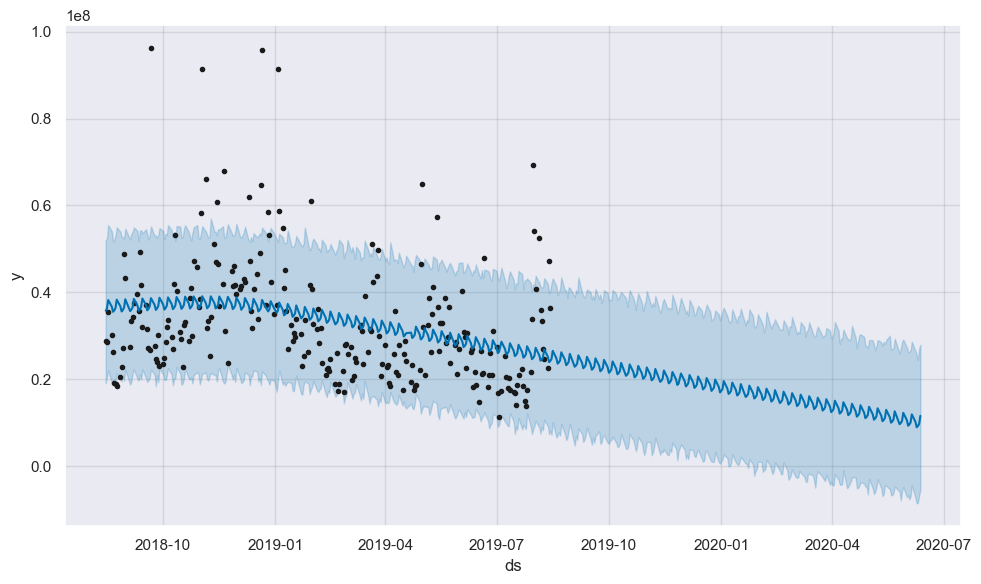

In [236]:
model.plot(prediction)
plt.show()

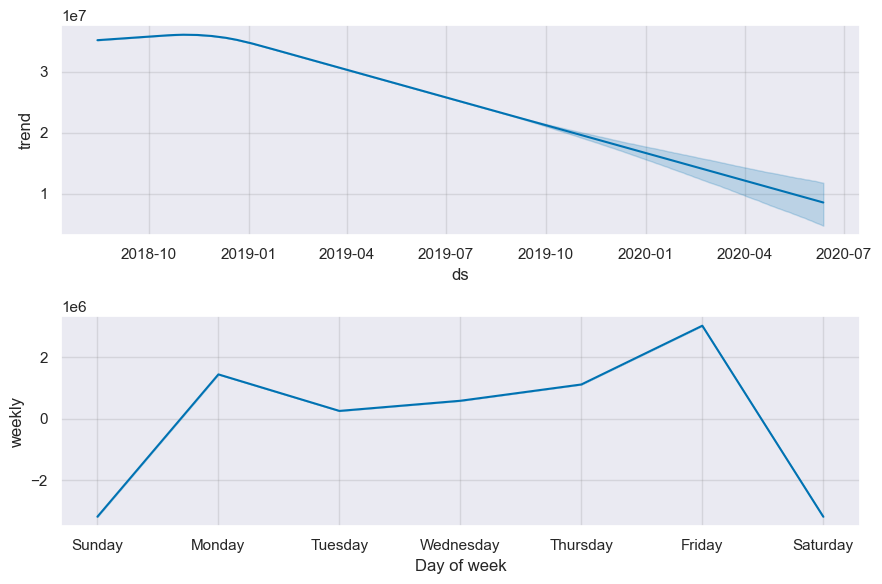

In [237]:
model.plot_components(prediction)
plt.show()